# Capstone Project: KL/Selangor Rental Price Prediction

## 1. Problem Statement

When it comes to setting up a rental price or giving out indications, homeowners, valuers, or realtors, tend to rely on the internet to check the rental market rate from property websites such as PropertyGuru, mudah.my, iProperty, and many others. As easy as it may sound, “the inconsistency of information can easily be found in websites as most of the residential property providers did not own its property data. The objective of most residential property web is more focused on providing a platform for users to share their information. Thus, inconsistent information occurs due to different sets of data may not be entered by the same person (Kee Li Yap, 2020). One can choose their preferred rate suitable for their home from the property websites, but how can one assured on the accuracy of the price per the property’s features? Under-pricing can result in a loss of income, while on the other hand, overpricing can make it difficult to rent the property and lose out on a suitable customer base. It is, therefore, crucial to examine the rental price carefully and suggest a fair rental rate that reflects the property’s value (Dong Xue Ying, 2023). Hence, in this project, I will predict the rental range in terms of low, medium, high.

Commonly used models for predicting rental prices include Logistic Regression, Decision Trees, Random Forests, and Gradient Boosting algorithms.


## 1.2 Objectives
1.To identify the trend of rental rate/price.

2.To identify the most correlated features that influence rental rate/prices

3.To build a model that predicts the monthly rental for high-rise residential property in KL/Selangor using a dataset. 


## 2. Data Acquisition

In this project I will use a high-rise housing dataset obtained from Kaggel (https://www.kaggle.com/datasets/ariewijaya/rent-pricing-kuala-lumpur-malaysi).


## 3. Explore the data

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

%matplotlib inline

library will be added/edited as i progress

In [2]:
rental = pd.read_csv('data.csv')

In [3]:
rental.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [4]:
rental.shape

(19991, 14)

In [5]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

In [6]:
rental.describe()

,ads_id,completion_year,parking,bathroom
count,1.999100e+04,10806.000000,14289.000000,19985.000000
mean,9.970671e+07,2014.822321,1.416824,1.891719
std,3.482575e+06,6.735355,0.567368,0.556266
min,1.652551e+07,1977.000000,1.000000,1.000000
25%,9.984012e+07,2012.000000,1.000000,2.000000
50%,1.002127e+08,2017.000000,1.000000,2.000000
75%,1.006179e+08,2020.000000,2.000000,2.000000
max,1.008546e+08,2025.000000,10.000000,8.000000


In [7]:
rental.dtypes

ads_id                     int64
prop_name                 object
completion_year          float64
monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

In [8]:
rental.isnull().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

## 3.1 Data cleaning/filling

Null value is a no-no in data analysis. So, these null values must be replaced with some other value by using the df.fillna function.

From the above figure, 8 out of 9 columns (completion_year, monthly_rent, rooms, parking, bathroom, furnished, facilities and additional_facilities) I will fill the null values with the df.fillna().mode() function. This function will use the mode of the column to fill or replace the null values in the very same column. 


In [9]:
rental['parking'].fillna(rental['parking'].mode()[0], inplace=True)

In [10]:
rental.isnull().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                     0
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

In [11]:
rental.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [12]:
rental['monthly_rent'].fillna(rental['monthly_rent'].mode()[0], inplace=True)

In [13]:
rental['completion_year'].fillna(rental['completion_year'].mode()[0], inplace=True)

In [14]:
rental['rooms'].fillna(rental['rooms'].mode()[0], inplace=True)

In [15]:
rental['bathroom'].fillna(rental['bathroom'].mode()[0], inplace=True)

In [16]:
rental['furnished'].fillna(rental['furnished'].mode()[0], inplace=True)

In [17]:
rental['facilities'].fillna(rental['facilities'].mode()[0], inplace=True)

In [18]:
rental['additional_facilities'].fillna(rental['additional_facilities'].mode()[0], inplace=True)

In [19]:
rental.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,2021.0,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,2021.0,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,2021.0,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [20]:
rental.isnull().sum()

ads_id                     0
prop_name                948
completion_year            0
monthly_rent               0
location                   0
property_type              0
rooms                      0
parking                    0
bathroom                   0
size                       0
furnished                  0
facilities                 0
additional_facilities      0
region                     0
dtype: int64

### Drop unwanted columns

Ads_id and prop_name columns are not usable, so both columns will be  dropped 

In [21]:
rental.drop('ads_id', axis=1, inplace=True)

In [22]:
rental.drop('prop_name', axis=1, inplace=True)

In [23]:
rental.head()

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,2021.0,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,2021.0,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,2021.0,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [24]:
rental.isnull().sum()

completion_year          0
monthly_rent             0
location                 0
property_type            0
rooms                    0
parking                  0
bathroom                 0
size                     0
furnished                0
facilities               0
additional_facilities    0
region                   0
dtype: int64

In [25]:
rental.shape

(19991, 12)

### Clasifying the monthly_rent

Since I am going to do a Classification model, I will need to classify the rental data as it is a continuous number. If I am to do a Regression model, this is not needed.

Since there is no guidelines to classify the monthly rental, I would have to deduce it myself. As rental in real estate can be a subjective matter (as it depends on various factors), I would classify them into 3 categories, low/medium/high. When it comes to paying for a rental, it will be based on the salary. Can you afford to pay for it or not? So, such classification would be based on the average salary of 3 main categories in Malaysia that is, B40/M40/T20. Based on the average salary of each group, the range of how much can they afford to pay for rent would be the threshold for the classification.

According to DOSM, in 2022, the mean (average) income across the household groups is:
B40 – RM3,401
M40 – RM7,971
T20 – RM19,752

Median
B40 – RM3,440
M40 – RM7,694
T20 – RM15,867. 


Threshold
B40 – RM5,250 and below
M40 – RM 5250 – RM11,819
T20 – RM11,820 and above

According to Speedhome, there is no strict rule on how much of your income should go to rent as it is all depends on your neighborhood, your place of work, and how much you earn. However, experts have advised to not surpass 30% of your income when spending on a rental.

So, from the threshold, I will take 30% as the mark-up.

For B40 and M40 I used the highest amount of the threshold, RM5,520 and RM11,819 respectively. However, for T20 I used the mean as it has a higher amount than its median and also as T20 income starts from 11.8k and above to which there is no limit. 

Finally, this new range would be the threshold for the classification. It will be classified as follows:

Low – From RM1600 and below
Medium – Between RM1600 to RM5999
High – From RM6000 and above


that include one's affodability to rent a house based on it's monthly income

### Extract value from monthly_rent column

For this column, firstly I will have to extract the numbers only using the function df.str.extract. This will create a new column (monthly_rent_price). Then I sorted the values from lowest to highest using the df.sort_values function as the values are now a series. The output showed that there are some rows with 6-digits figures which is inappropriate to be considered as rental. Therefore, I have to replace the values in these cells using df.loc and np.random.randint function. But before that, I used the df.filter function to take a deeper look at the column like how many rows have at least 6 digits. 

In [26]:
rental['monthly_rent_price'] = rental['monthly_rent'].str.extract(r'(\d+\s?\d*)').replace(' ', '', regex=True).astype(int)

In [27]:
rental['monthly_rent_price']

0        4200
1        2300
2        1000
3        1700
4        1299
         ... 
19986    1200
19987    1300
19988    1350
19989    1200
19990    1000
Name: monthly_rent_price, Length: 19991, dtype: int32

In [28]:
rental

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,monthly_rent_price
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,4200
1,2021.0,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,2300
2,2021.0,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,1000
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,1700
4,2021.0,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,1299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,2021.0,RM 1 200 per month,Selangor - Kajang,Apartment,3,1.0,2.0,1000 sq.ft.,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor,1200
19987,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor,1300
19988,2021.0,RM 1 350 per month,Selangor - Kajang,Condominium,3,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,1350
19989,2021.0,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor,1200


### Sorting the values from lowest to highest

In [29]:
monthly_rent_sort = rental['monthly_rent_price'].sort_values()

In [30]:
monthly_rent_sort

18712        70
17145        80
8062         80
15765        85
1716         90
          ...  
8642     550000
2374     580000
8640     580000
5705     580000
6367     780000
Name: monthly_rent_price, Length: 19991, dtype: int32

### Filter the values

From the sorting output, there are some rows with 6-digit figures which is inappropriate to be considered as rental. Instead it is more to selling price figure. So, I want to filter the rental to take deeper look.

### 100k and above

In [31]:
filtered_rent1 = rental[rental['monthly_rent_price'] > 100000]

In [32]:
sorted_filtered_rent1 = filtered_rent1.sort_values(by='monthly_rent_price')

In [33]:
print(sorted_filtered_rent1)

       completion_year          monthly_rent                    location  \
14207           2021.0  RM 105 000 per month         Selangor - Beranang   
10885           2021.0  RM 125 000 per month  Selangor - Damansara Damai   
12113           2021.0  RM 127 898 per month     Selangor - Kuala Langat   
12128           2021.0  RM 190 000 per month    Selangor - Petaling Jaya   
3341            2021.0  RM 200 000 per month  Kuala Lumpur - Wangsa Maju   
17140           2016.0  RM 215 000 per month   Selangor - Seri Kembangan   
17527           2021.0  RM 230 000 per month           Selangor - Cheras   
19868           2021.0  RM 240 000 per month   Selangor - Seri Kembangan   
8266            2021.0  RM 249 900 per month       Kuala Lumpur - Kepong   
7292            2021.0  RM 250 000 per month  Kuala Lumpur - Wangsa Maju   
3175            2021.0  RM 250 000 per month  Kuala Lumpur - Wangsa Maju   
3173            2021.0  RM 250 000 per month  Kuala Lumpur - Wangsa Maju   
9544        

### between 10k to 100k

In [34]:
filtered_rent2 = rental[(rental['monthly_rent_price'] >= 10000) & (rental['monthly_rent_price'] <= 100000)]

In [35]:
sorted_filtered_rent2 = filtered_rent2.sort_values(by='monthly_rent_price')

In [36]:
print(sorted_filtered_rent2)

       completion_year         monthly_rent                          location  \
588             2021.0  RM 10 000 per month        Kuala Lumpur - Bukit Tunku   
5398            2021.0  RM 10 000 per month  Kuala Lumpur - Damansara Heights   
4965            2021.0  RM 10 000 per month         Kuala Lumpur - Mont Kiara   
3673            2009.0  RM 10 000 per month        Kuala Lumpur - Bukit Tunku   
1237            2007.0  RM 10 000 per month               Kuala Lumpur - KLCC   
3093            2010.0  RM 10 000 per month               Kuala Lumpur - KLCC   
5273            2010.0  RM 10 300 per month               Kuala Lumpur - KLCC   
1128            2021.0  RM 10 500 per month         Kuala Lumpur - Mont Kiara   
6569            2021.0  RM 11 000 per month      Kuala Lumpur - Bukit Bintang   
6307            2021.0  RM 11 000 per month         Kuala Lumpur - Mont Kiara   
7460            2015.0  RM 11 500 per month       Kuala Lumpur - Ampang Hilir   
792             2015.0  RM 1

### between 5k to 10k

In [37]:
filtered_rent3 = rental[(rental['monthly_rent_price'] >= 5000) & (rental['monthly_rent_price'] <= 9500)]

In [38]:
sorted_filtered_rent3 = filtered_rent3.sort_values(by='monthly_rent_price')

In [39]:
print(sorted_filtered_rent3)

       completion_year        monthly_rent                     location  \
7017            2014.0  RM 5 000 per month        Kuala Lumpur - Cheras   
2290            2005.0  RM 5 000 per month    Kuala Lumpur - Mont Kiara   
2542            2012.0  RM 5 000 per month    Kuala Lumpur - Mont Kiara   
12627           2021.0  RM 5 000 per month       Selangor - Subang Jaya   
7895            2005.0  RM 5 000 per month    Kuala Lumpur - Mont Kiara   
...                ...                 ...                          ...   
1970            2019.0  RM 9 000 per month    Kuala Lumpur - Mont Kiara   
4350            2021.0  RM 9 000 per month  Kuala Lumpur - Ampang Hilir   
1432            2021.0  RM 9 500 per month        Kuala Lumpur - Cheras   
5757            2015.0  RM 9 500 per month          Kuala Lumpur - KLCC   
18214           2013.0  RM 9 500 per month     Selangor - Petaling Jaya   

           property_type rooms  parking  bathroom         size  \
7017         Condominium     6   

### 1K to 5K

In [40]:
filtered_rent4 = rental[(rental['monthly_rent_price'] >= 1000) & (rental['monthly_rent_price'] <= 5000)]

In [41]:
sorted_filtered_rent4 = filtered_rent4.sort_values(by='monthly_rent_price')

In [42]:
print(sorted_filtered_rent4)

       completion_year        monthly_rent                        location  \
19990           2016.0  RM 1 000 per month            Selangor - Cyberjaya   
5803            2021.0  RM 1 000 per month       Kuala Lumpur - Taman Desa   
5802            2021.0  RM 1 000 per month      Kuala Lumpur - Bukit Jalil   
5798            2021.0  RM 1 000 per month          Kuala Lumpur - Setapak   
5792            2021.0  RM 1 000 per month       Kuala Lumpur - Taman Desa   
...                ...                 ...                             ...   
1755            2021.0  RM 5 000 per month  Kuala Lumpur - Solaris Dutamas   
3152            2011.0  RM 5 000 per month             Kuala Lumpur - KLCC   
7017            2014.0  RM 5 000 per month           Kuala Lumpur - Cheras   
1134            2021.0  RM 5 000 per month       Kuala Lumpur - Mont Kiara   
4410            2021.0  RM 5 000 per month           Kuala Lumpur - Ampang   

           property_type rooms  parking  bathroom         size 

### 1k and below

In [43]:
filtered_rent5 = rental[(rental['monthly_rent_price'] < 1000) & (rental['monthly_rent_price'] <= 1000)]

In [44]:
sorted_filtered_rent5 = filtered_rent5.sort_values(by='monthly_rent_price')

In [45]:
print(sorted_filtered_rent5)

       completion_year      monthly_rent                   location  \
18712           2013.0   RM 70 per month  Selangor - Seri Kembangan   
8062            1994.0   RM 80 per month     Kuala Lumpur - Setapak   
17145           2021.0   RM 80 per month  Selangor - Kota Damansara   
15765           2021.0   RM 85 per month  Selangor - Seri Kembangan   
1716            2021.0   RM 90 per month     Kuala Lumpur - Setapak   
...                ...               ...                        ...   
19433           2021.0  RM 999 per month         Selangor - Puchong   
15961           2021.0  RM 999 per month    Selangor - Kuala Langat   
17486           2014.0  RM 999 per month             Selangor - USJ   
16516           2021.0  RM 999 per month       Selangor - Cyberjaya   
16274           2015.0  RM 999 per month  Selangor - Subang Bestari   

           property_type rooms  parking  bathroom         size  \
18712  Service Residence     3      1.0       2.0   100 sq.ft.   
8062         Co

### replace cells with selling price-like figures

To ensure the replacement of value are working, I want to check before and after values of the dataset using .describe()

In [46]:
print(rental['monthly_rent_price'].describe())

count     19991.000000
mean       2149.073533
std       14651.683832
min          70.000000
25%        1100.000000
50%        1400.000000
75%        1800.000000
max      780000.000000
Name: monthly_rent_price, dtype: float64


To identify values with non-rental figues, I use the condition df['monthly_rent_numeric'] >= 40000 

and replace those values with np.random.randint(1000, 5000, size=(df['monthly_rent_numeric'] >= 40000).sum()) to generate random values within the range 1000 to 5000 and replace the identified values.

In [47]:
rental.loc[rental['monthly_rent_price'] >= 40000, 'monthly_rent_price'] = np.random.randint(1000, 5000, size=(rental['monthly_rent_price'] >= 40000).sum())

In [48]:
print(rental['monthly_rent_price'].describe())

count    19991.000000
mean      1612.019609
std        946.772801
min         70.000000
25%       1100.000000
50%       1400.000000
75%       1800.000000
max      18500.000000
Name: monthly_rent_price, dtype: float64


The max value has changed from 780,000 to 18,500 which means the replacement worked.

### label the monthly_rent_price data

In [49]:
# Define the bins and labels
bins = [0, 1600, 6000, np.inf]
labels = ['low', 'medium', 'high']

# Create a new column with the categories
rental['rent_category'] = pd.cut(rental['monthly_rent_price'], bins=bins, labels=labels)

In [50]:
rental['rent_category']

0        medium
1        medium
2           low
3        medium
4           low
          ...  
19986       low
19987       low
19988       low
19989       low
19990       low
Name: rent_category, Length: 19991, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [51]:
rental

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,monthly_rent_price,rent_category
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,4200,medium
1,2021.0,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,2300,medium
2,2021.0,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,1000,low
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,1700,medium
4,2021.0,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,1299,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,2021.0,RM 1 200 per month,Selangor - Kajang,Apartment,3,1.0,2.0,1000 sq.ft.,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor,1200,low
19987,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor,1300,low
19988,2021.0,RM 1 350 per month,Selangor - Kajang,Condominium,3,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,1350,low
19989,2021.0,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor,1200,low


In [52]:
rental1 = rental.copy()

In [53]:
rental2 = rental1.copy()

### facilities and additional_facilities

For these columns, it has multiple values in a single cell. The values are separated into individual columns by creating a new function with 0 and 1 as the value assigned. 0 represents False and 1 represents True.

In [54]:
rental2.head()

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,monthly_rent_price,rent_category
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,4200,medium
1,2021.0,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,2300,medium
2,2021.0,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,1000,low
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,1700,medium
4,2021.0,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,1299,low


In [55]:
def split_facilities(facilities):
    if pd.notna(facilities):
        return facilities.split(', ')
    else:
        return []

In [56]:
# Apply the function to split the facilities and additional facilities columns into lists
rental2['facilities'] = rental2['facilities'].apply(split_facilities)
rental2['additional_facilities'] = rental2['additional_facilities'].apply(split_facilities)

In [57]:
# Use MultiLabelBinarizer to one-hot encode the facilities
from sklearn.preprocessing import MultiLabelBinarizer

mlb_facilities = MultiLabelBinarizer()
facilities_encoded = mlb_facilities.fit_transform(rental2['facilities'])
facilities_df = pd.DataFrame(facilities_encoded, columns=mlb_facilities.classes_)

In [58]:
# Use MultiLabelBinarizer to one-hot encode the additional facilities
mlb_additional = MultiLabelBinarizer()
additional_encoded = mlb_additional.fit_transform(rental2['additional_facilities'])
additional_df = pd.DataFrame(additional_encoded, columns=mlb_additional.classes_)

In [59]:
# Concatenate the original DataFrame with the new one-hot encoded DataFrames
rental2 = pd.concat([rental2, facilities_df, additional_df], axis=1)

In [60]:
rental2

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,...,Security,Squash Court,Swimming Pool,Tennis Court,,Air-Cond,Cooking Allowed,Internet,Near KTM/LRT,Washing Machine
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"[Minimart, Gymnasium, Security, Playground, Sw...",...,1,0,1,0,0,1,1,0,0,1
1,2021.0,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"[Playground, Parking, Barbeque area, Security,...",...,1,0,1,0,0,1,1,0,1,0
2,2021.0,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"[Minimart, Jogging Track, Lift, Swimming Pool]",...,0,0,1,0,0,1,1,0,0,1
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"[Parking, Playground, Swimming Pool, Squash Co...",...,1,1,1,0,0,0,1,0,1,1
4,2021.0,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,2021.0,RM 1 200 per month,Selangor - Kajang,Apartment,3,1.0,2.0,1000 sq.ft.,Partially Furnished,"[Security, Parking, Lift, Minimart, Multipurpo...",...,1,0,0,0,0,0,0,0,1,0
19987,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4,2.0,3.0,1427 sq.ft.,Partially Furnished,"[Jogging Track, Barbeque area, Playground, Swi...",...,0,0,1,1,0,1,1,0,0,0
19988,2021.0,RM 1 350 per month,Selangor - Kajang,Condominium,3,2.0,2.0,1270 sq.ft.,Partially Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,1,0,1,0,0,1,1,0,0,1
19989,2021.0,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3,1.0,2.0,1100 sq.ft.,Fully Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,1,1,1,1,0,0,1,0,0,1


In [61]:
rental2.dtypes

completion_year           float64
monthly_rent               object
location                   object
property_type              object
rooms                      object
parking                   float64
bathroom                  float64
size                       object
furnished                  object
facilities                 object
additional_facilities      object
region                     object
monthly_rent_price          int32
rent_category            category
10                          int32
11                          int32
6                           int32
Barbeque area               int32
Club house                  int32
Gymnasium                   int32
Jogging Track               int32
Lift                        int32
Minimart                    int32
Multipurpose hall           int32
Parking                     int32
Playground                  int32
Sauna                       int32
Security                    int32
Squash Court                int32
Swimming Pool 

In [62]:
rental2.columns

Index(['completion_year', 'monthly_rent', 'location', 'property_type', 'rooms',
       'parking', 'bathroom', 'size', 'furnished', 'facilities',
       'additional_facilities', 'region', 'monthly_rent_price',
       'rent_category', '10', '11', '6', 'Barbeque area', 'Club house',
       'Gymnasium', 'Jogging Track', 'Lift', 'Minimart', 'Multipurpose hall',
       'Parking', 'Playground', 'Sauna', 'Security', 'Squash Court',
       'Swimming Pool', 'Tennis Court', '', 'Air-Cond', 'Cooking Allowed',
       'Internet', 'Near KTM/LRT', 'Washing Machine'],
      dtype='object')

### Drop columns '10', '11', '6' and ' '

Since these columns are in numbers and have no additional info on its meaning, I will drop these colums to prevent confusion or redundancy on the facilities (since these data was originally scrapped from a website, these numbers may have been recorded as number of facilities or could have been some kind of errors for that specific unit/property).

In [63]:
# List of columns to drop
columns_to_drop = ['10', '11', '6', '']

# Drop the specified columns
rental2.drop(columns=columns_to_drop, inplace=True)

In [64]:
rental2.to_csv('rental2.csv')

### Extract value from size column

This column contain a mix of numerical values and text (e.g., "1842 sq.ft."). I need to extract the number only in order to the analysis.

In [65]:
rental2['size_num_sf'] = rental2['size'].str.extract(r'(\d+\s?\d*)').replace(' ', '', regex=True).astype(int)

In [66]:
rental2['size_num_sf']

0        1842
1        1170
2         650
3         743
4         494
         ... 
19986    1000
19987    1427
19988    1270
19989    1100
19990     580
Name: size_num_sf, Length: 19991, dtype: int32

In [67]:
rental2

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,...,Security,Squash Court,Swimming Pool,Tennis Court,Air-Cond,Cooking Allowed,Internet,Near KTM/LRT,Washing Machine,size_num_sf
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"[Minimart, Gymnasium, Security, Playground, Sw...",...,1,0,1,0,1,1,0,0,1,1842
1,2021.0,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"[Playground, Parking, Barbeque area, Security,...",...,1,0,1,0,1,1,0,1,0,1170
2,2021.0,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"[Minimart, Jogging Track, Lift, Swimming Pool]",...,0,0,1,0,1,1,0,0,1,650
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"[Parking, Playground, Swimming Pool, Squash Co...",...,1,1,1,0,0,1,0,1,1,743
4,2021.0,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,1,0,1,0,1,0,0,0,0,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,2021.0,RM 1 200 per month,Selangor - Kajang,Apartment,3,1.0,2.0,1000 sq.ft.,Partially Furnished,"[Security, Parking, Lift, Minimart, Multipurpo...",...,1,0,0,0,0,0,0,1,0,1000
19987,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4,2.0,3.0,1427 sq.ft.,Partially Furnished,"[Jogging Track, Barbeque area, Playground, Swi...",...,0,0,1,1,1,1,0,0,0,1427
19988,2021.0,RM 1 350 per month,Selangor - Kajang,Condominium,3,2.0,2.0,1270 sq.ft.,Partially Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,1,0,1,0,1,1,0,0,1,1270
19989,2021.0,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3,1.0,2.0,1100 sq.ft.,Fully Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,1,1,1,1,0,1,0,0,1,1100


In [68]:
# Create bins for size intervals
bins = [0, 250, 500, 850, 1000, 1250, 1500, 1850, 2000, 2250, 2500]
labels = ['0-250', '251-500', '501-850', '851-1000', '1001-1250', '1251-1500', '1501-1850', '1851-2000', '2001-2250', '2251-2500']
rental2['size_bins'] = pd.cut(rental2['size_num_sf'], bins=bins, labels=labels, right=False)

Since this project will be use a Classification model, the size was categorized it by the interval of 250sf (0-250, 251 -500…until 2,500 sf)

In [69]:
rental2

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,...,Squash Court,Swimming Pool,Tennis Court,Air-Cond,Cooking Allowed,Internet,Near KTM/LRT,Washing Machine,size_num_sf,size_bins
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"[Minimart, Gymnasium, Security, Playground, Sw...",...,0,1,0,1,1,0,0,1,1842,1501-1850
1,2021.0,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"[Playground, Parking, Barbeque area, Security,...",...,0,1,0,1,1,0,1,0,1170,1001-1250
2,2021.0,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,1.0,2.0,650 sq.ft.,Fully Furnished,"[Minimart, Jogging Track, Lift, Swimming Pool]",...,0,1,0,1,1,0,0,1,650,501-850
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"[Parking, Playground, Swimming Pool, Squash Co...",...,1,1,0,0,1,0,1,1,743,501-850
4,2021.0,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,0,1,0,1,0,0,0,0,494,251-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,2021.0,RM 1 200 per month,Selangor - Kajang,Apartment,3,1.0,2.0,1000 sq.ft.,Partially Furnished,"[Security, Parking, Lift, Minimart, Multipurpo...",...,0,0,0,0,0,0,1,0,1000,1001-1250
19987,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4,2.0,3.0,1427 sq.ft.,Partially Furnished,"[Jogging Track, Barbeque area, Playground, Swi...",...,0,1,1,1,1,0,0,0,1427,1251-1500
19988,2021.0,RM 1 350 per month,Selangor - Kajang,Condominium,3,2.0,2.0,1270 sq.ft.,Partially Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,0,1,0,1,1,0,0,1,1270,1251-1500
19989,2021.0,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3,1.0,2.0,1100 sq.ft.,Fully Furnished,"[Parking, Security, Lift, Swimming Pool, Playg...",...,1,1,1,0,1,0,0,1,1100,1001-1250


In [70]:
rental2.dtypes

completion_year           float64
monthly_rent               object
location                   object
property_type              object
rooms                      object
parking                   float64
bathroom                  float64
size                       object
furnished                  object
facilities                 object
additional_facilities      object
region                     object
monthly_rent_price          int32
rent_category            category
Barbeque area               int32
Club house                  int32
Gymnasium                   int32
Jogging Track               int32
Lift                        int32
Minimart                    int32
Multipurpose hall           int32
Parking                     int32
Playground                  int32
Sauna                       int32
Security                    int32
Squash Court                int32
Swimming Pool               int32
Tennis Court                int32
Air-Cond                    int32
Cooking Allowe

## 3.2 Data Visualisation

Under this section, counts is used to see the total numbers of the variable in terms of type/rent_category.

Proportion is used to see the composition of data within a category.


### 1. Categorical vs categorical variables

### Distribution of rent_category

In [71]:
rental2["rent_category"].value_counts()

rent_category
low       12996
medium     6905
high         90
Name: count, dtype: int64

### Distribution of property_type

In [72]:
rental2["property_type"].value_counts()

property_type
Condominium                                           8448
Service Residence                                     5310
Apartment                                             5259
Flat                                                   581
Studio                                                 189
Others                                                  89
Duplex                                                  76
Townhouse Condo                                         35
Condo / Services residence / Penthouse / Townhouse       1
Residential                                              1
Houses                                                   1
Soho                                                     1
Name: count, dtype: int64

In [73]:
# Property types to replace
types_to_replace = ['Others', 'Bungalow House', 'Houses', 'Soho', 'Residential', 'Condo / Services residence / Penthouse / Townhouse']

# Property types to choose from
replacement_types = ['Condominium', 'Apartment', 'Service Residence', 'Studio', 'Flat', 'Duplex']

# Set the random seed for reproducibility
np.random.seed(42)

# Function to replace specific types with random selection from replacement types
def replace_with_random_type(property_type):
    if property_type in types_to_replace:
        return np.random.choice(replacement_types)
    return property_type

# Apply the function to the property_type column
rental2['property_type'] = rental2['property_type'].apply(replace_with_random_type)

print(rental2)

       completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom  

During the visualization of the data, there were some other redundant types of properties and also other labels (Others', 'Bungalow House', 'Houses', 'Soho', 'Residential', 'Condo / Services residence / Penthouse / Townhouse'). These values were replaced with existing common labels ('Condominium', 'Apartment', 'Service Residence', 'Studio', 'Flat', 'Duplex') using np.random.choice.

In [74]:
# Create a contingency table
contingency_table = pd.crosstab(rental2['property_type'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table['Total'] = contingency_table.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table.loc['Total'] = contingency_table.sum(axis=0)

# Display the contingency table
display(contingency_table)

rent_category,low,medium,high,Total
property_type,,,,
Apartment,4815,462,1,5278
Condominium,4703,3686,68,8457
Duplex,60,31,2,93
Flat,588,8,0,596
Service Residence,2627,2677,17,5321
Studio,184,27,0,211
Townhouse Condo,19,14,2,35
Total,12996,6905,90,19991


### property_type vs rent_category (stacked bar plot)

rent_category,low,medium,high
property_type,,,
Apartment,0.912277,0.087533,0.000189
Condominium,0.556107,0.435852,0.008041
Duplex,0.645161,0.333333,0.021505
Flat,0.986577,0.013423,0.000000
Service Residence,0.493704,0.503101,0.003195
Studio,0.872038,0.127962,0.000000
Townhouse Condo,0.542857,0.400000,0.057143


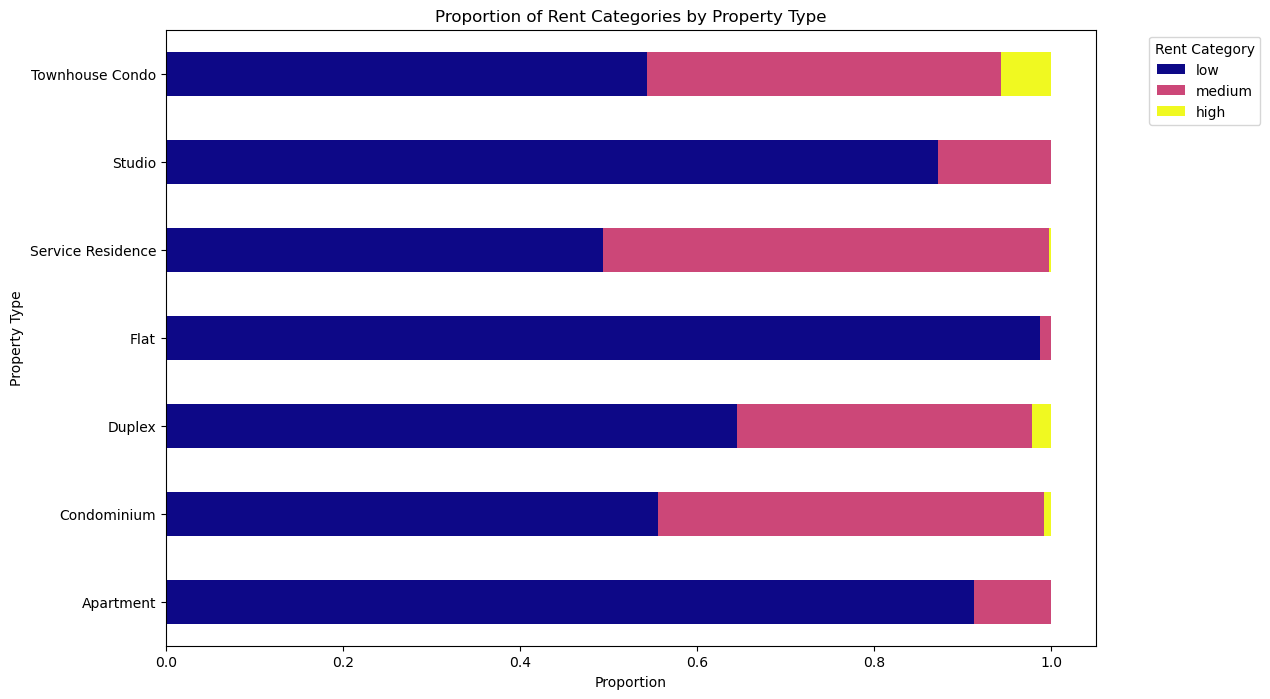

In [75]:
# compute a cross_tab
cross_tab = pd.crosstab(rental2['property_type'], rental2['rent_category'], normalize='index')
display(cross_tab)

# Plot the cross-tabulation
cross_tab.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='plasma')

# Adding plot labels and title
plt.ylabel('Property Type')
plt.xlabel('Proportion')
plt.title('Proportion of Rent Categories by Property Type')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Distribution of furnished

In [76]:
# Create a contingency table
contingency_table2 = pd.crosstab(rental2['furnished'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table2['Total'] = contingency_table2.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table2.loc['Total'] = contingency_table2.sum(axis=0)

# Display the contingency table
display(contingency_table2)

rent_category,low,medium,high,Total
furnished,,,,
Fully Furnished,3454,4942,71,8467
Not Furnished,3348,171,1,3520
Partially Furnished,6194,1792,18,8004
Total,12996,6905,90,19991


### furnished vs rent_category (stacked bar plot)

rent_category,low,medium,high
furnished,,,
Fully Furnished,0.407937,0.583678,0.008385
Not Furnished,0.951136,0.048580,0.000284
Partially Furnished,0.773863,0.223888,0.002249


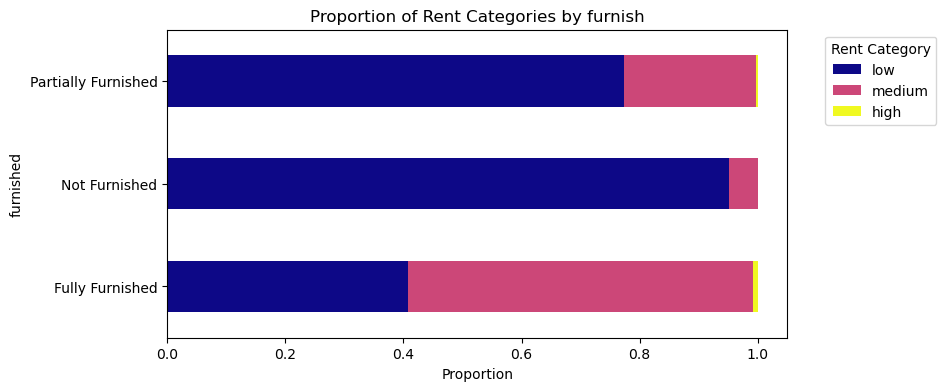

In [77]:
# compute a cross_tab
cross_tab2 = pd.crosstab(rental2['furnished'], rental2['rent_category'], normalize='index')
display(cross_tab2)

# Plot the cross-tabulation
cross_tab2.plot(kind='barh', stacked=True, figsize=(8, 4), colormap='plasma')

# Adding plot labels and title
plt.ylabel('furnished')
plt.xlabel('Proportion')
plt.title('Proportion of Rent Categories by furnish')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Property Type vs Furnished

In [78]:
# Create a contingency table
contingency_table34 = pd.crosstab(rental2['furnished'], rental2['property_type'])

# Calculate row totals and add as a new column
contingency_table34['Total'] = contingency_table34.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table34.loc['Total'] = contingency_table34.sum(axis=0)

# Display the contingency table
display(contingency_table34)

property_type,Apartment,Condominium,Duplex,Flat,Service Residence,Studio,Townhouse Condo,Total
furnished,,,,,,,,
Fully Furnished,1030,4099,46,38,3110,135,9,8467
Not Furnished,1789,905,13,386,402,15,10,3520
Partially Furnished,2459,3453,34,172,1809,61,16,8004
Total,5278,8457,93,596,5321,211,35,19991


### Distribution of size_bins

In [79]:
# Create a contingency table
contingency_table3 = pd.crosstab(rental2['size_bins'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table3['Total'] = contingency_table3.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table3.loc['Total'] = contingency_table3.sum(axis=0)

# Display the contingency table
display(contingency_table3)

rent_category,low,medium,high,Total
size_bins,,,,
0-250,124,6,1,131
251-500,880,145,1,1026
501-850,5074,1364,1,6439
851-1000,3904,1807,1,5712
1001-1250,2493,2118,6,4617
1251-1500,414,941,2,1357
1501-1850,88,357,15,460
1851-2000,3,40,4,47
2001-2250,7,51,7,65


### size_bins vs rent_category (bar plot)

C:\Users\Acer\AppData\Local\Temp\ipykernel_26004\311837359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rent_category', y='size_bins', data=rental2, palette='plasma')


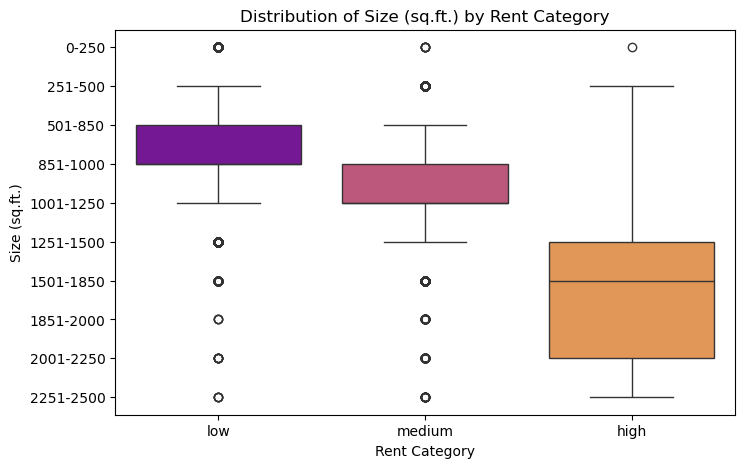

In [80]:
# Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='rent_category', y='size_bins', data=rental2, palette='plasma')

# Adding plot labels and title
plt.xlabel('Rent Category')
plt.ylabel('Size (sq.ft.)')
plt.title('Distribution of Size (sq.ft.) by Rent Category')
plt.show()

### Distribution of Location

In [81]:
# Create a contingency table
contingency_table4 = pd.crosstab(rental2['location'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table4['Total'] = contingency_table4.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table4.loc['Total'] = contingency_table4.sum(axis=0)

# Display the contingency table
display(contingency_table4)

rent_category,low,medium,high,Total
location,,,,
Kuala Lumpur - Ampang,174,155,2,331
Kuala Lumpur - Ampang Hilir,10,69,8,87
Kuala Lumpur - Bandar Damai Perdana,5,4,0,9
Kuala Lumpur - Bandar Menjalara,30,15,0,45
Kuala Lumpur - Bandar Tasik Selatan,13,0,0,13
...,...,...,...,...
Selangor - Sungai Buloh,43,13,0,56
Selangor - Telok Panglima Garang,0,1,0,1
Selangor - USJ,27,2,0,29


                                 location  count
0                   Kuala Lumpur - Cheras   1623
1                       Selangor - Kajang   1022
2                  Kuala Lumpur - Setapak    973
3                    Selangor - Shah Alam    971
4                    Selangor - Cyberjaya    879
..                                    ...    ...
129                         Selangor - 43      1
130                         Selangor - 77      1
131           Kuala Lumpur - Chan Sow Lin      1
132  Selangor - Pulau Indah (Pulau Lumut)      1
133               Selangor - Puncak Jalil      1

[134 rows x 2 columns]


C:\Users\Acer\AppData\Local\Temp\ipykernel_26004\4271090269.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='count', y='location', palette='plasma')


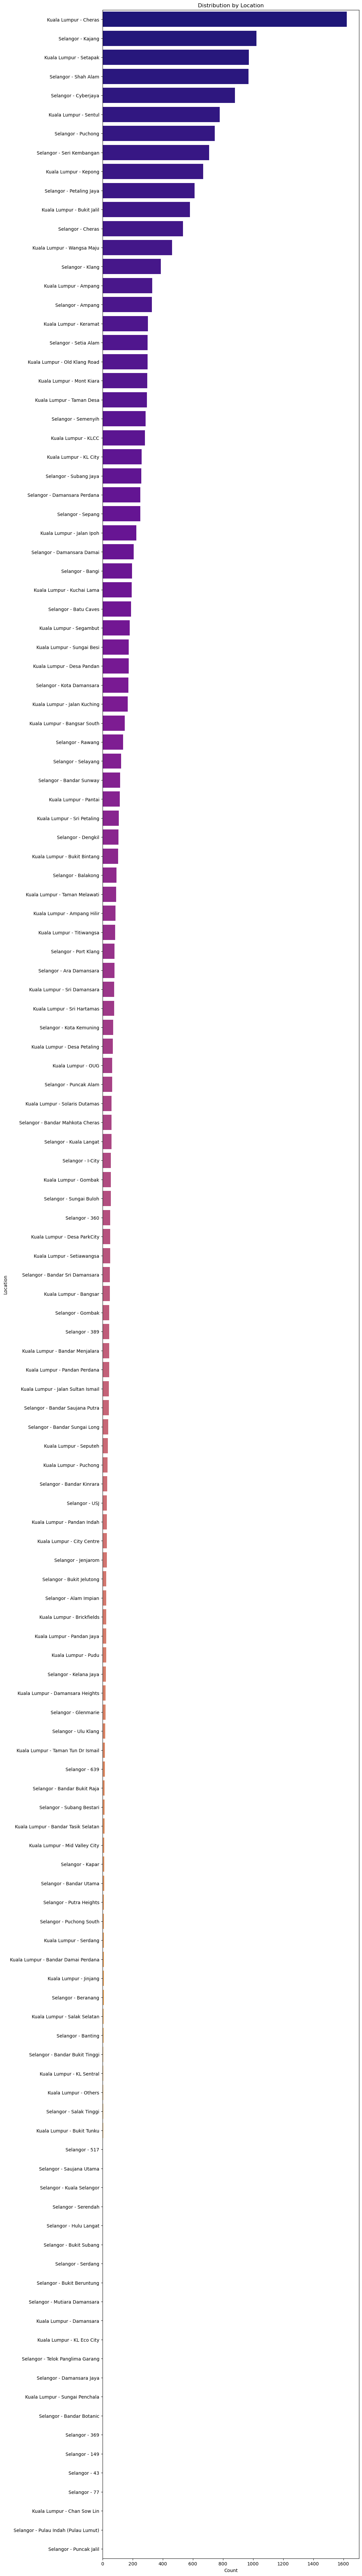

In [82]:
# Count occurrences of each location
location_counts = rental2['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']
print(location_counts)

# Plot the bar chart
plt.figure(figsize=(10, 100))
sns.barplot(data=location_counts, x='count', y='location', palette='plasma')
plt.title('Distribution by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

### Distribution of Region

In [83]:
# Create a contingency table
contingency_table27 = pd.crosstab(rental2['region'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table27['Total'] = contingency_table27.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table27.loc['Total'] = contingency_table27.sum(axis=0)

# Display the contingency table
display(contingency_table27)

rent_category,low,medium,high,Total
region,,,,
Kuala Lumpur,5218,4690,83,9991
Selangor,7778,2215,7,10000
Total,12996,6905,90,19991


### Distribution of Region by rent_category

rent_category,low,medium,high
region,,,
Kuala Lumpur,0.52227,0.469422,0.008307
Selangor,0.77780,0.221500,0.000700


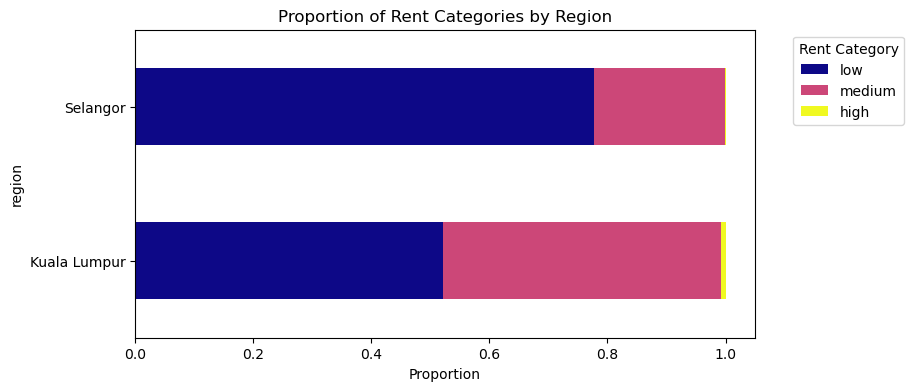

In [84]:
# compute a cross_tab
cross_tab6 = pd.crosstab(rental2['region'], rental2['rent_category'], normalize='index')
display(cross_tab6)

# Plot the cross-tabulation
cross_tab6.plot(kind='barh', stacked=True, figsize=(8, 4), colormap='plasma')

# Adding plot labels and title
plt.ylabel('region')
plt.xlabel('Proportion')
plt.title('Proportion of Rent Categories by Region')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2. Categorical vs Numerical Variables

Under this section, counts is used to see the total numbers of the variable in terms of type/rent_category.

Proportion is used to see the composition of data within a category.


### Distribution of rooms

In [85]:
rental2["rooms"].value_counts()

rooms
3               12786
2                3294
1                2394
4                1389
5                  92
6                  23
7                   8
More than 10        2
9                   2
10                  1
Name: count, dtype: int64

In [86]:
# Rooms to replace
types_to_replace1 = ['More than 10']

# Property types to choose from
replacement_types1 = ['1', '2', '3', '4']

# Set the random seed for reproducibility
np.random.seed(42)

# Function to replace specific types with random selection from replacement types
def replace_with_random_type(rooms):
    if rooms in types_to_replace1:
        return np.random.choice(replacement_types1)
    return rooms

# Apply the function to the property_type column
rental2['rooms'] = rental2['rooms'].apply(replace_with_random_type)

print(rental2)

       completion_year        monthly_rent                         location  \
0               2022.0  RM 4 200 per month        Kuala Lumpur - Taman Desa   
1               2021.0  RM 2 300 per month            Kuala Lumpur - Cheras   
2               2021.0  RM 1 000 per month        Kuala Lumpur - Taman Desa   
3               2020.0  RM 1 700 per month            Kuala Lumpur - Sentul   
4               2021.0  RM 1 299 per month        Kuala Lumpur - Mont Kiara   
...                ...                 ...                              ...   
19986           2021.0  RM 1 200 per month                Selangor - Kajang   
19987           2018.0  RM 1 300 per month  Selangor - Bandar Saujana Putra   
19988           2021.0  RM 1 350 per month                Selangor - Kajang   
19989           2021.0  RM 1 200 per month             Selangor - Cyberjaya   
19990           2016.0  RM 1 000 per month             Selangor - Cyberjaya   

           property_type rooms  parking  bathroom  

In [87]:
rental2["rooms"].value_counts()

rooms
3     12787
2      3294
1      2394
4      1390
5        92
6        23
7         8
9         2
10        1
Name: count, dtype: int64

There are 10 rooms in total, but for a high-rise property with more than 6 rooms can be quite non-sense. So, cells with more than 6 rooms were replaced from randomly selected values (1,2,3,4,5,6).

Why at least 6 rooms? Because the maximum number of rooms we have seen so far usually is 4 rooms, same goes to bathroom. However, owner can renovate their own unit by partitioning the living room into 1 or 2 rooms.


In [88]:
# Convert the 'rooms' column to integers
rental2['rooms'] = rental2['rooms'].astype(int)

In [89]:
# Define the function to replace the values
def replace_large_room_counts(df, column, max_rooms, replace_range, random_state=None):
    # Find indices of the rows with large room counts
    large_room_indices = df[df[column] > max_rooms].index
    # Replace the values with random integers within the specified range
    df.loc[large_room_indices, column] = np.random.choice(replace_range, size=len(large_room_indices))
    return df

# Replace the values for rooms with 7 or more with a random value between 1 and 6
rental2 = replace_large_room_counts(rental2, 'rooms', 6, range(1, 7), random_state=42)

# Check the replacement
print(rental2['rooms'].value_counts())

rooms
3    12792
2     3295
1     2394
4     1391
5       96
6       23
Name: count, dtype: int64


In [90]:
# Create a contingency table
contingency_table5 = pd.crosstab(rental2['rooms'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table5['Total'] = contingency_table5.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table5.loc['Total'] = contingency_table5.sum(axis=0)

# Display the contingency table
display(contingency_table5)

rent_category,low,medium,high,Total
rooms,,,,
1,1846,546,2,2394
2,1720,1569,6,3295
3,8907,3863,22,12792
4,473,875,43,1391
5,48,36,12,96
6,2,16,5,23
Total,12996,6905,90,19991


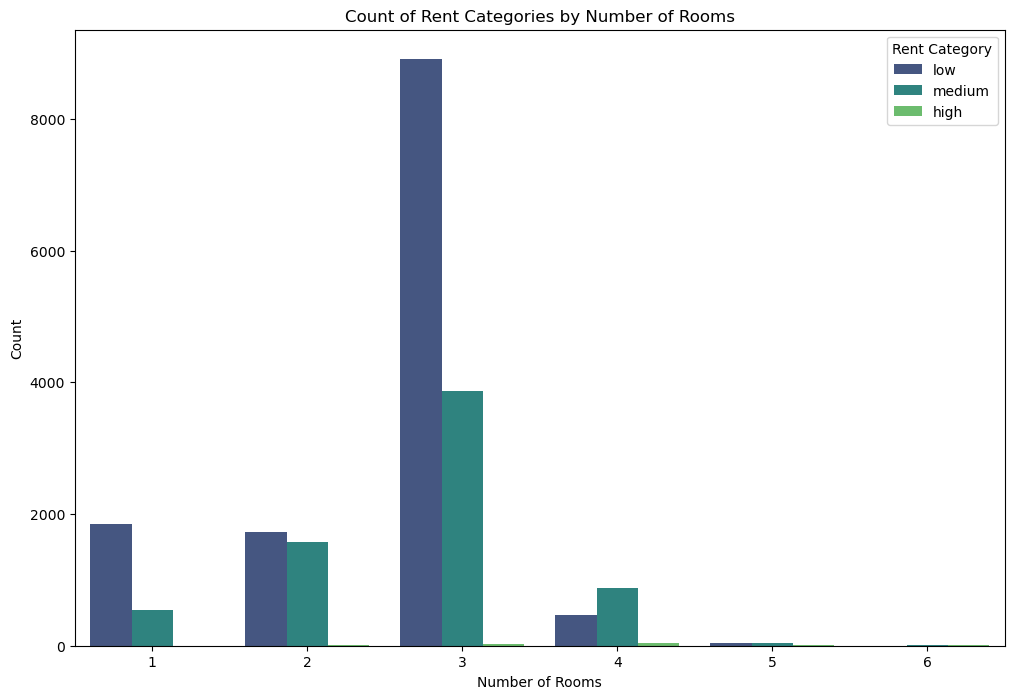

In [91]:
# Grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(data=rental2, x='rooms', hue='rent_category', palette='viridis')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.title('Count of Rent Categories by Number of Rooms')
plt.legend(title='Rent Category')
plt.show()

rent_category,low,medium,high
rooms,,,
1,0.771094,0.228070,0.000835
2,0.522003,0.476176,0.001821
3,0.696295,0.301986,0.001720
4,0.340043,0.629044,0.030913
5,0.500000,0.375000,0.125000
6,0.086957,0.695652,0.217391


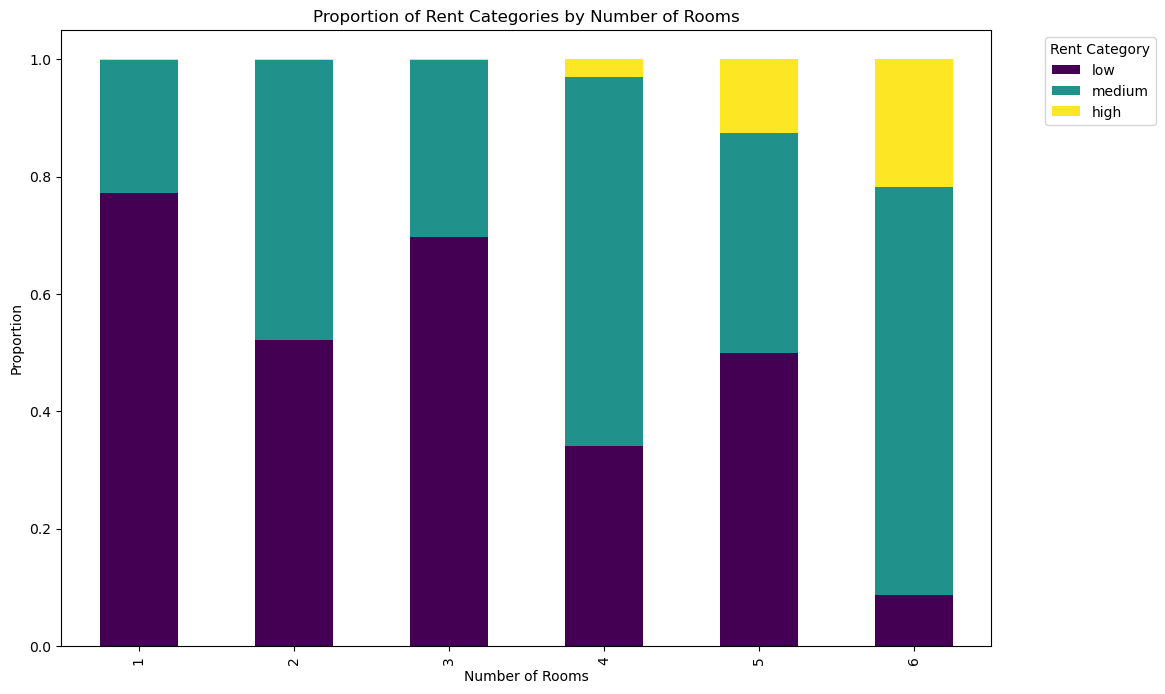

In [92]:
# Create the crosstab with proportions
cross_tab3 = pd.crosstab(rental2['rooms'], rental2['rent_category'], normalize='index')
display(cross_tab3)

# Plot the crosstab as a bar chart
cross_tab3.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding plot labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Proportion')
plt.title('Proportion of Rent Categories by Number of Rooms')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Distribution of number of parking

In [93]:
rental2["parking"].value_counts()

parking
1.0     14346
2.0      5427
3.0       179
4.0        23
10.0        6
5.0         6
6.0         2
9.0         1
7.0         1
Name: count, dtype: int64

There are total of 10 parking, but for a high-rise property each unit will be allocated minimum of 1 or 2 car parks. But for bigger units may have more allocated car parks, usually 3 or 4 car parks. So, cells with more than 4 car parks were replaced from randomly selected values (1,2,3,4).

In [94]:
# Define the function to replace the values
def replace_large_parking_counts(df, column, max_parking, replace_range):
    # Find indices of the rows with large parking counts
    large_parking_indices = df[df[column] > max_parking].index
    # Replace the values with random integers within the specified range
    df.loc[large_parking_indices, column] = np.random.choice(replace_range, size=len(large_parking_indices))
    return df

# Replace the values for parking with 5 or more with a random value between 1 and 4
rental2 = replace_large_parking_counts(rental2, 'parking', 4, range(1, 5))

# Check the replacement
print(rental2['parking'].value_counts())

parking
1.0    14350
2.0     5434
3.0      179
4.0       28
Name: count, dtype: int64


In [95]:
# Create a contingency table
contingency_table6 = pd.crosstab(rental2['parking'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table6['Total'] = contingency_table6.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table6.loc['Total'] = contingency_table6.sum(axis=0)

# Display the contingency table
display(contingency_table6)

rent_category,low,medium,high,Total
parking,,,,
1.0,10327,3997,26,14350
2.0,2612,2778,44,5434
3.0,46,117,16,179
4.0,11,13,4,28
Total,12996,6905,90,19991


### number of parking vs rent_category  (bar plot)

rent_category,low,medium,high
property_type,,,
Apartment,0.912277,0.087533,0.000189
Condominium,0.556107,0.435852,0.008041
Duplex,0.645161,0.333333,0.021505
Flat,0.986577,0.013423,0.000000
Service Residence,0.493704,0.503101,0.003195
Studio,0.872038,0.127962,0.000000
Townhouse Condo,0.542857,0.400000,0.057143


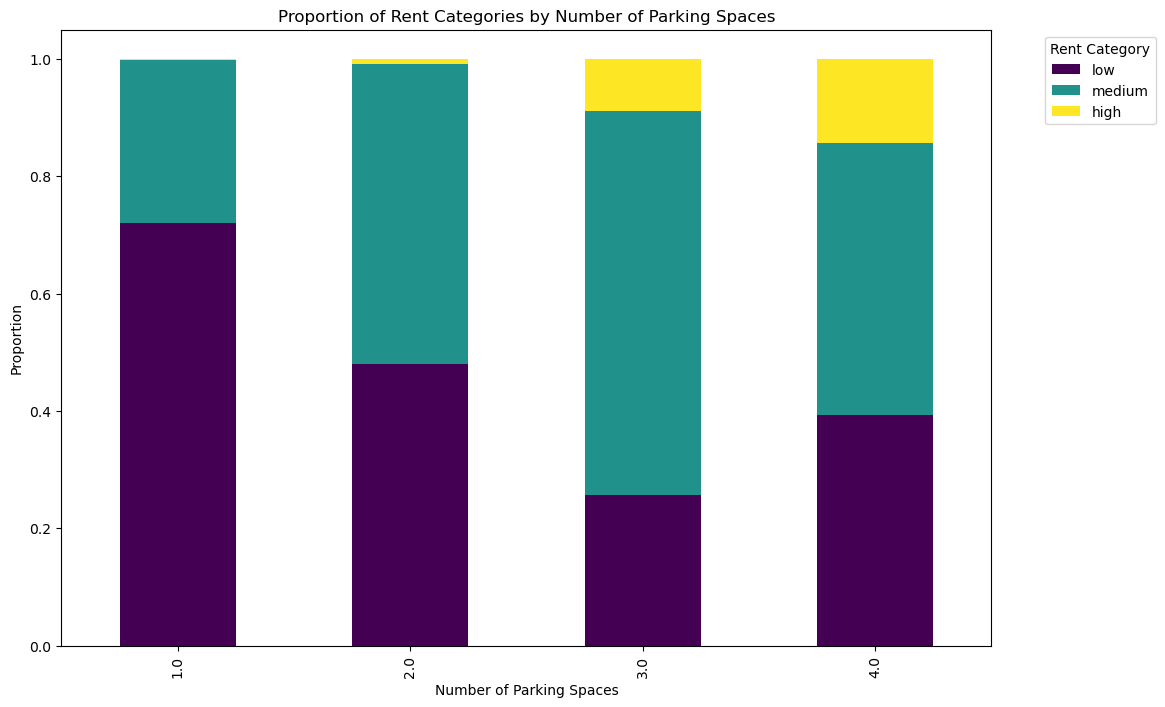

In [96]:
# Create crosstab
cross_tab4 = pd.crosstab(rental2['parking'], rental2['rent_category'], normalize='index')
display(cross_tab)

# Plot the crosstab
cross_tab4.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding plot labels and title
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Proportion')
plt.title('Proportion of Rent Categories by Number of Parking Spaces')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Distribution of bathroom

In [97]:
rental2["bathroom"].value_counts()

bathroom
2.0    14893
1.0     3800
3.0     1065
4.0      160
5.0       54
6.0        9
7.0        7
8.0        3
Name: count, dtype: int64

There are 8 bathrooms in total, but for a high-rise property with more than 4 bathrooms can be quite non-sense. So, cells with more than 4 bathrooms were replaced from randomly selected values (1,2,3,4).

Why 4 bathrooms? The maximum number of bathrooms usually is 4.


In [98]:
# Define the function to replace the values
def replace_large_bathroom_counts(df, column, max_bathroom, replace_range):
    # Find indices of the rows with large bathroom counts
    large_bathroom_indices = df[df[column] > max_bathroom].index
    # Replace the values with random integers within the specified range
    df.loc[large_bathroom_indices, column] = np.random.choice(replace_range, size=len(large_bathroom_indices))
    return df

# Replace the values for parking with 5 or more with a random value between 1 and 4
rental2 = replace_large_bathroom_counts(rental2, 'bathroom', 4, range(1, 5))

# Check the replacement
print(rental2['bathroom'].value_counts())

bathroom
2.0    14917
1.0     3812
3.0     1081
4.0      181
Name: count, dtype: int64


In [99]:
# Create a contingency table
contingency_table7 = pd.crosstab(rental2['bathroom'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table7['Total'] = contingency_table7.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table7.loc['Total'] = contingency_table7.sum(axis=0)

# Display the contingency table
display(contingency_table7)

rent_category,low,medium,high,Total
bathroom,,,,
1.0,2983,823,6,3812
2.0,9726,5172,19,14917
3.0,271,789,21,1081
4.0,16,121,44,181
Total,12996,6905,90,19991


### bathroom vs rent_category (bar plot)

rent_category,low,medium,high
bathroom,,,
1.0,0.782529,0.215897,0.001574
2.0,0.652008,0.346719,0.001274
3.0,0.250694,0.729880,0.019426
4.0,0.088398,0.668508,0.243094


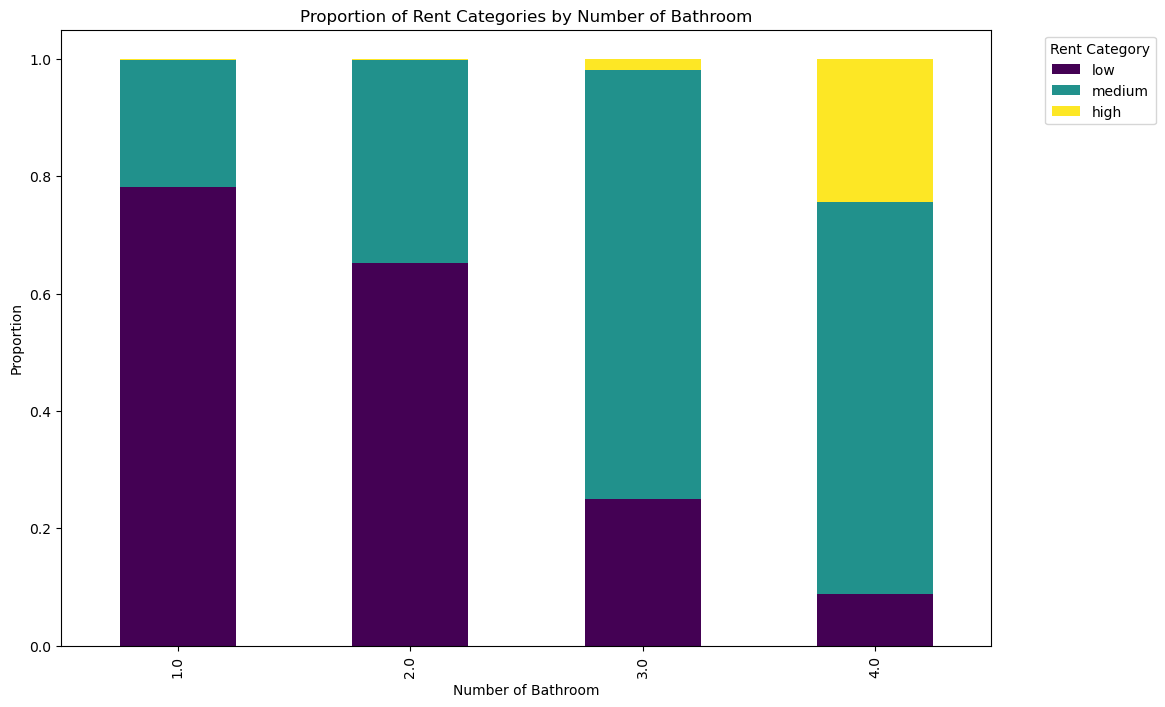

In [100]:
# Create crosstab
cross_tab5 = pd.crosstab(rental2['bathroom'], rental2['rent_category'], normalize='index')
display(cross_tab5)

# Plot the crosstab
cross_tab5.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding plot labels and title
plt.xlabel('Number of Bathroom')
plt.ylabel('Proportion')
plt.title('Proportion of Rent Categories by Number of Bathroom')
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### property_type vs number of room 

In [102]:
# Create a contingency table
contingency_table31 = pd.crosstab(rental2['rooms'], rental2['property_type'])

# Calculate row totals and add as a new column
contingency_table31['Total'] = contingency_table31.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table31.loc['Total'] = contingency_table31.sum(axis=0)

# Display the contingency table
display(contingency_table31)

property_type,Apartment,Condominium,Duplex,Flat,Service Residence,Studio,Townhouse Condo,Total
rooms,,,,,,,,
1,153,868,58,9,1115,190,1,2394
2,415,1064,11,199,1593,9,4,3295
3,4541,5492,18,379,2329,9,24,12792
4,153,952,6,9,263,2,6,1391
5,12,64,0,0,19,1,0,96
6,4,17,0,0,2,0,0,23
Total,5278,8457,93,596,5321,211,35,19991


### property_type vs number of bathroom

In [104]:
# Create a contingency table
contingency_table32 = pd.crosstab(rental2['bathroom'], rental2['property_type'])

# Calculate row totals and add as a new column
contingency_table32['Total'] = contingency_table32.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table32.loc['Total'] = contingency_table32.sum(axis=0)

# Display the contingency table
display(contingency_table32)

property_type,Apartment,Condominium,Duplex,Flat,Service Residence,Studio,Townhouse Condo,Total
bathroom,,,,,,,,
1.0,597,1185,15,305,1518,189,3,3812
2.0,4606,6344,69,289,3570,18,21,14917
3.0,73,780,6,2,208,4,8,1081
4.0,2,148,3,0,25,0,3,181
Total,5278,8457,93,596,5321,211,35,19991


### property_type vs number of parking

In [106]:
# Create a contingency table
contingency_table33 = pd.crosstab(rental2['parking'], rental2['property_type'])

# Calculate row totals and add as a new column
contingency_table33['Total'] = contingency_table33.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table33.loc['Total'] = contingency_table33.sum(axis=0)

# Display the contingency table
display(contingency_table33)

property_type,Apartment,Condominium,Duplex,Flat,Service Residence,Studio,Townhouse Condo,Total
parking,,,,,,,,
1.0,4483,5413,80,564,3584,204,22,14350
2.0,778,2920,9,25,1682,7,13,5434
3.0,11,108,3,5,52,0,0,179
4.0,6,16,1,2,3,0,0,28
Total,5278,8457,93,596,5321,211,35,19991


### Barbeque area vs rent_category  (bar plot)

In [107]:
# Create a contingency table
contingency_table8 = pd.crosstab(rental2['Barbeque area'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table8['Total'] = contingency_table8.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table8.loc['Total'] = contingency_table8.sum(axis=0)

# Display the contingency table
display(contingency_table8)

rent_category,low,medium,high,Total
Barbeque area,,,,
0,6675,2333,32,9040
1,6321,4572,58,10951
Total,12996,6905,90,19991


rent_category,low,medium,high
Barbeque area,,,
0,0.738385,0.258075,0.003540
1,0.577208,0.417496,0.005296


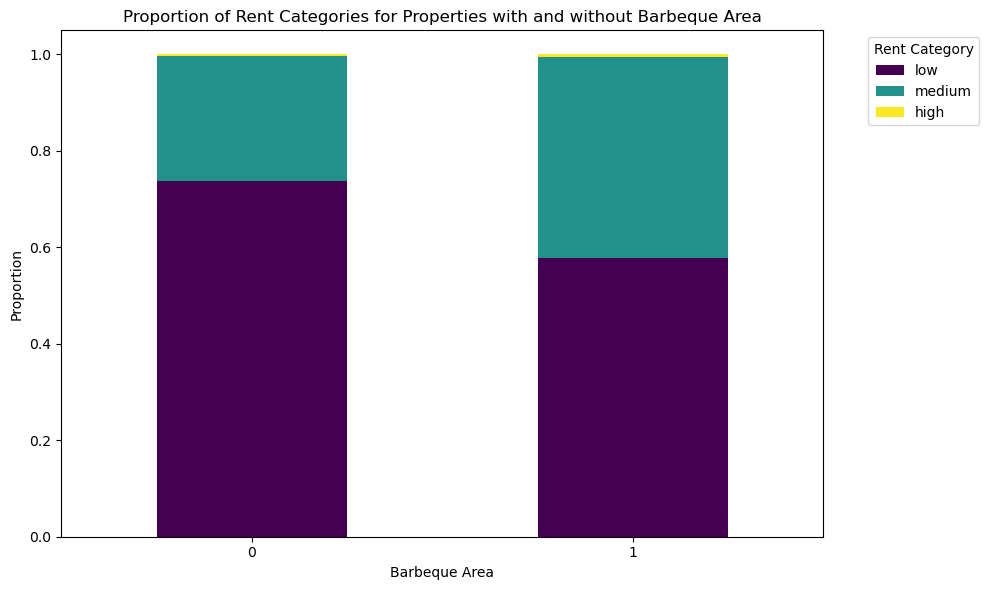

In [108]:
# Create a crosstab of the Barbeque area and rent_category
crosstab1 = pd.crosstab(rental2['Barbeque area'], rental2['rent_category'], normalize='index')
display(crosstab1)

# Plot the stacked bar plot
crosstab1.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Barbeque Area')
plt.xlabel('Barbeque Area')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Club house vs rent_category (bar plot)

In [109]:
# Create a contingency table
contingency_table9 = pd.crosstab(rental2['Club house'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table9['Total'] = contingency_table9.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table9.loc['Total'] = contingency_table9.sum(axis=0)

# Display the contingency table
display(contingency_table9)

rent_category,low,medium,high,Total
Club house,,,,
0,9512,4582,51,14145
1,3484,2323,39,5846
Total,12996,6905,90,19991


rent_category,low,medium,high
Club house,,,
0,0.672464,0.323931,0.003606
1,0.595963,0.397366,0.006671


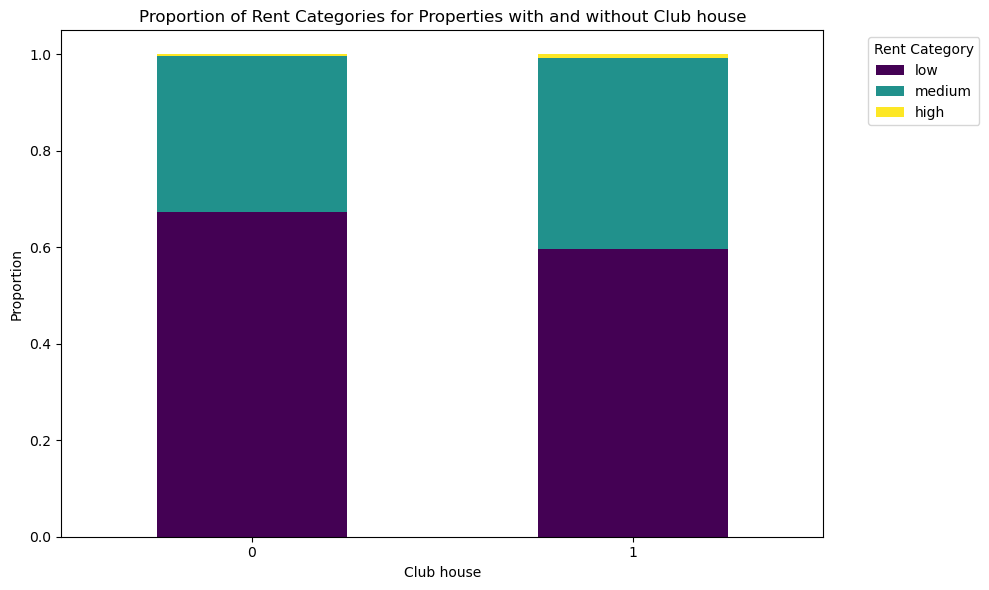

In [110]:
# Create a crosstab of the Barbeque area and rent_category
crosstab2 = pd.crosstab(rental2['Club house'], rental2['rent_category'], normalize='index')
display(crosstab2)

# Plot the stacked bar plot
crosstab2.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Club house')
plt.xlabel('Club house')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Gymnasium vs rent_category  (bar plot)

In [111]:
# Create a contingency table
contingency_table10 = pd.crosstab(rental2['Gymnasium'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table10['Total'] = contingency_table10.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table10.loc['Total'] = contingency_table10.sum(axis=0)

# Display the contingency table
display(contingency_table10)

rent_category,low,medium,high,Total
Gymnasium,,,,
0,4621,725,9,5355
1,8375,6180,81,14636
Total,12996,6905,90,19991


rent_category,low,medium,high
Gymnasium,,,
0,0.862932,0.135387,0.001681
1,0.572219,0.422247,0.005534


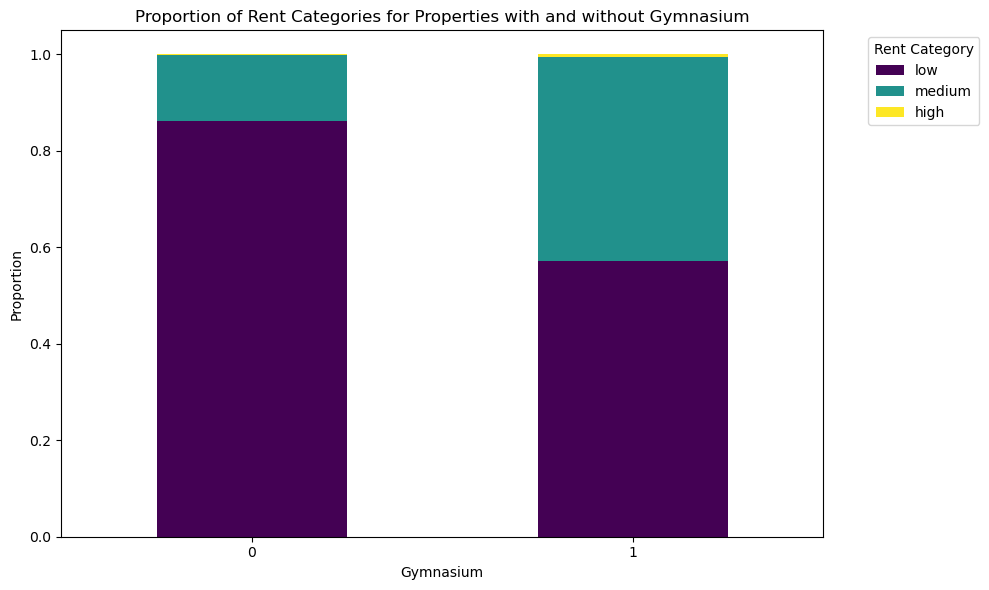

In [112]:
# Create a crosstab of the Barbeque area and rent_category
crosstab3 = pd.crosstab(rental2['Gymnasium'], rental2['rent_category'], normalize='index')
display(crosstab3)

# Plot the stacked bar plot
crosstab3.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Gymnasium')
plt.xlabel('Gymnasium')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Jogging Track vs rent_category  (bar plot)

In [113]:
# Create a contingency table
contingency_table11 = pd.crosstab(rental2['Jogging Track'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table11['Total'] = contingency_table11.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table11.loc['Total'] = contingency_table11.sum(axis=0)

# Display the contingency table
display(contingency_table11)

rent_category,low,medium,high,Total
Jogging Track,,,,
0,6368,2954,44,9366
1,6628,3951,46,10625
Total,12996,6905,90,19991


rent_category,low,medium,high
Jogging Track,,,
0,0.679906,0.315396,0.004698
1,0.623812,0.371859,0.004329


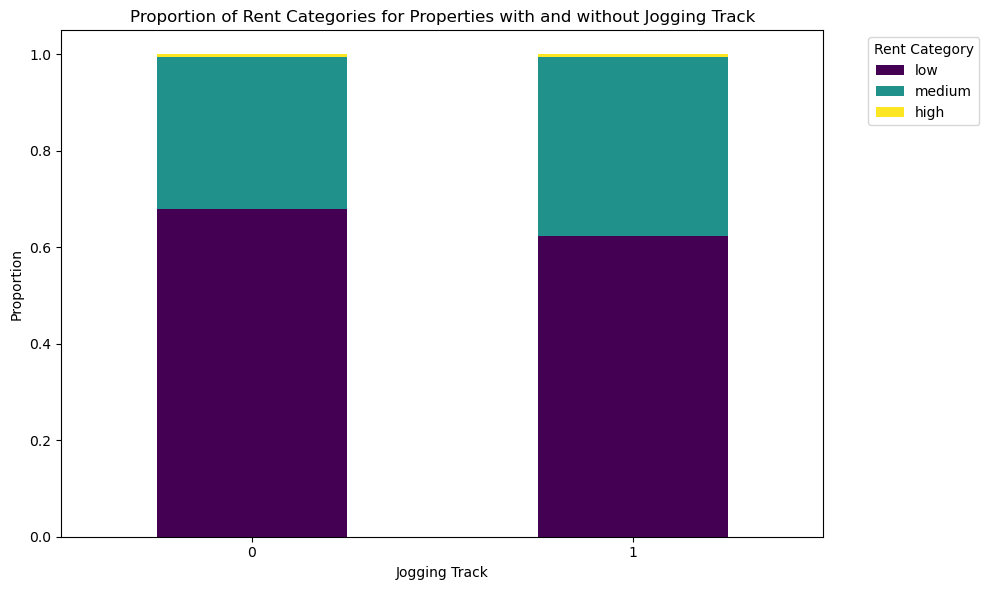

In [114]:
# Create a crosstab of the Barbeque area and rent_category
crosstab4 = pd.crosstab(rental2['Jogging Track'], rental2['rent_category'], normalize='index')
display(crosstab4)

# Plot the stacked bar plot
crosstab4.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Jogging Track')
plt.xlabel('Jogging Track')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Lift vs rent_category  (bar plot)

In [115]:
# Create a contingency table
contingency_table12 = pd.crosstab(rental2['Lift'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table12['Total'] = contingency_table12.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table12.loc['Total'] = contingency_table12.sum(axis=0)

# Display the contingency table
display(contingency_table12)

rent_category,low,medium,high,Total
Lift,,,,
0,4228,1885,27,6140
1,8768,5020,63,13851
Total,12996,6905,90,19991


rent_category,low,medium,high
Jogging Track,,,
0,0.679906,0.315396,0.004698
1,0.623812,0.371859,0.004329


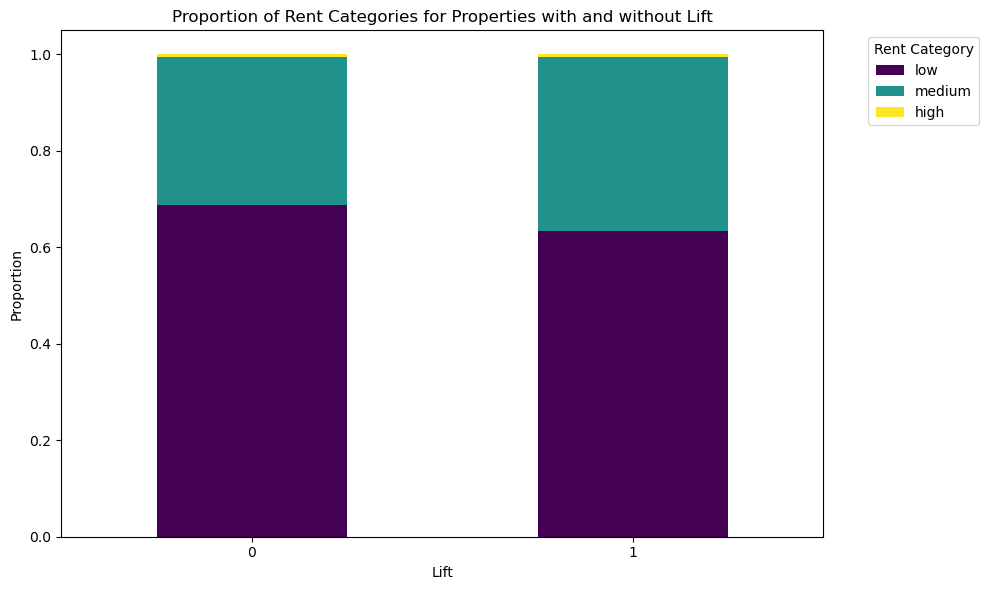

In [116]:
# Create a crosstab of the Barbeque area and rent_category
crosstab5 = pd.crosstab(rental2['Lift'], rental2['rent_category'], normalize='index')
display(crosstab4)

# Plot the stacked bar plot
crosstab5.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Lift')
plt.xlabel('Lift')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Minimart vs rent_category  (bar plot)

In [117]:
# Create a contingency table
contingency_table13 = pd.crosstab(rental2['Minimart'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table13['Total'] = contingency_table13.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table13.loc['Total'] = contingency_table13.sum(axis=0)

# Display the contingency table
display(contingency_table13)

rent_category,low,medium,high,Total
Minimart,,,,
0,4756,2716,47,7519
1,8240,4189,43,12472
Total,12996,6905,90,19991


rent_category,low,medium,high
Minimart,,,
0,0.632531,0.361218,0.006251
1,0.660680,0.335872,0.003448


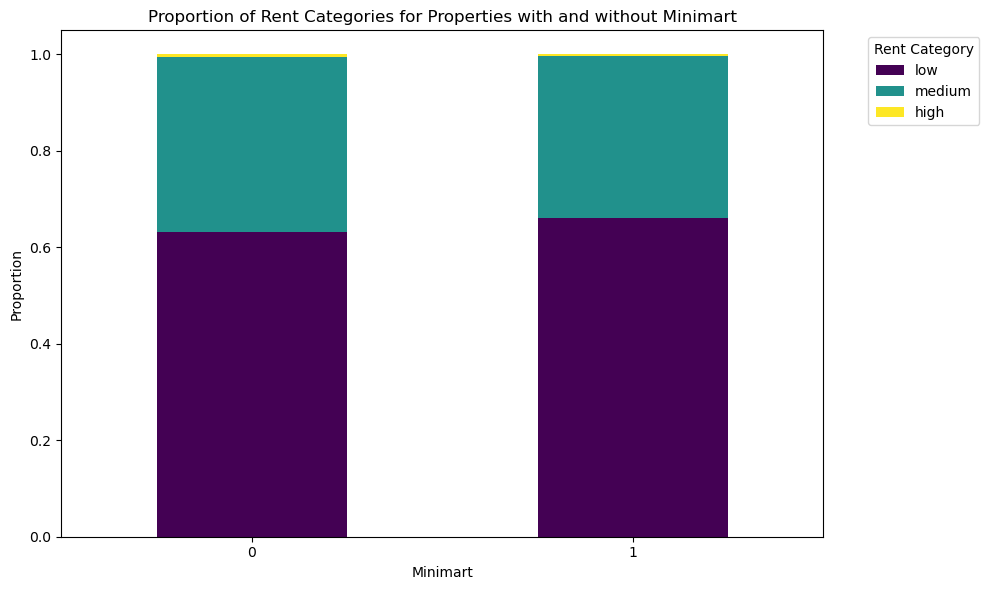

In [118]:
# Create a crosstab of the Barbeque area and rent_category
crosstab6 = pd.crosstab(rental2['Minimart'], rental2['rent_category'], normalize='index')
display(crosstab6)

# Plot the stacked bar plot
crosstab6.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Minimart')
plt.xlabel('Minimart')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Multipurpose hall vs rent_category  (bar plot)

rent_category,low,medium,high,Total
Multipurpose hall,,,,
0,6587,2867,42,9496
1,6409,4038,48,10495
Total,12996,6905,90,19991


rent_category,low,medium,high
Multipurpose hall,,,
0,0.693660,0.301917,0.004423
1,0.610672,0.384755,0.004574


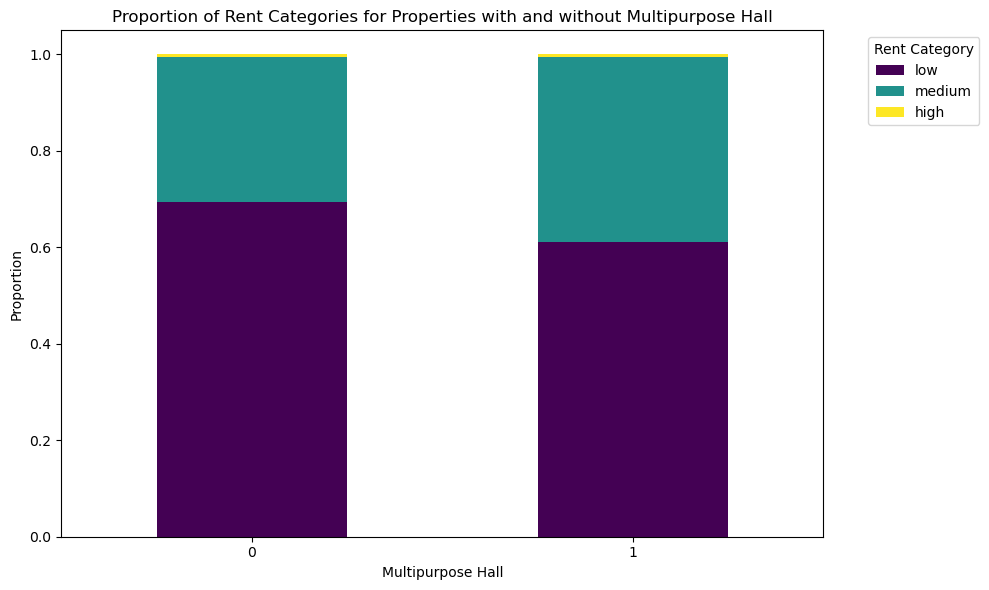

In [119]:
# Create a contingency table
contingency_table14 = pd.crosstab(rental2['Multipurpose hall'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table14['Total'] = contingency_table14.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table14.loc['Total'] = contingency_table14.sum(axis=0)

# Display the contingency table
display(contingency_table14)

# Create a crosstab of the Barbeque area and rent_category
crosstab7 = pd.crosstab(rental2['Multipurpose hall'], rental2['rent_category'], normalize='index')
display(crosstab7)

# Plot the stacked bar plot
crosstab7.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Multipurpose Hall')
plt.xlabel('Multipurpose Hall')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Parking vs rent_category (bar plot)

rent_category,low,medium,high,Total
Parking,,,,
0,1136,552,12,1700
1,11860,6353,78,18291
Total,12996,6905,90,19991


rent_category,low,medium,high
Parking,,,
0,0.668235,0.324706,0.007059
1,0.648406,0.347329,0.004264


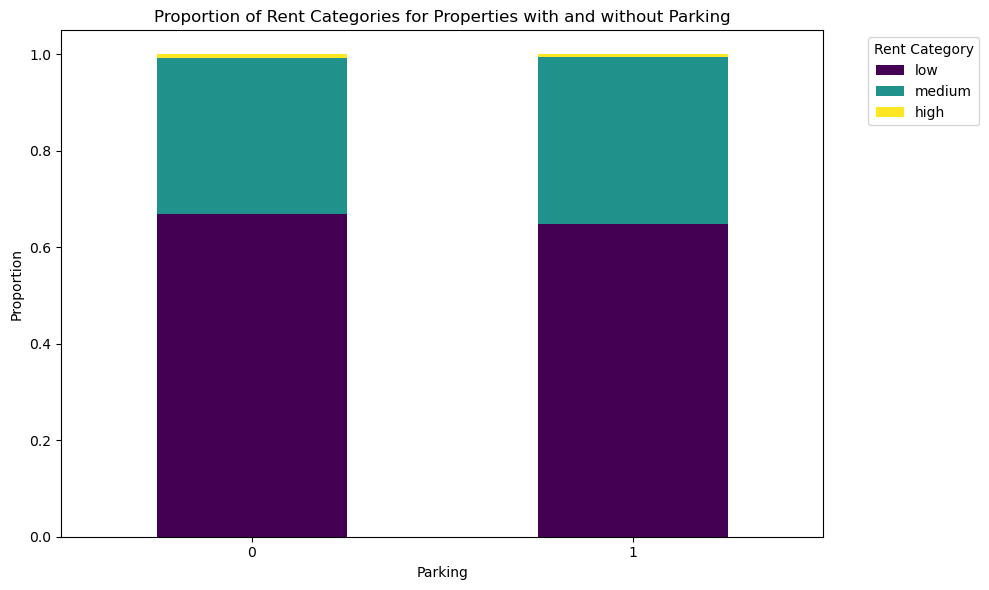

In [120]:
# Create a contingency table
contingency_table15 = pd.crosstab(rental2['Parking'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table15['Total'] = contingency_table15.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table15.loc['Total'] = contingency_table15.sum(axis=0)

# Display the contingency table
display(contingency_table15)

# Create a crosstab of the Barbeque area and rent_category
crosstab8 = pd.crosstab(rental2['Parking'], rental2['rent_category'], normalize='index')
display(crosstab8)

# Plot the stacked bar plot
crosstab8.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Parking')
plt.xlabel('Parking')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Playground vs rent_category  (bar plot)

rent_category,low,medium,high,Total
Playground,,,,
0,1980,634,11,2625
1,11016,6271,79,17366
Total,12996,6905,90,19991


rent_category,low,medium,high
Playground,,,
0,0.754286,0.241524,0.004190
1,0.634343,0.361108,0.004549


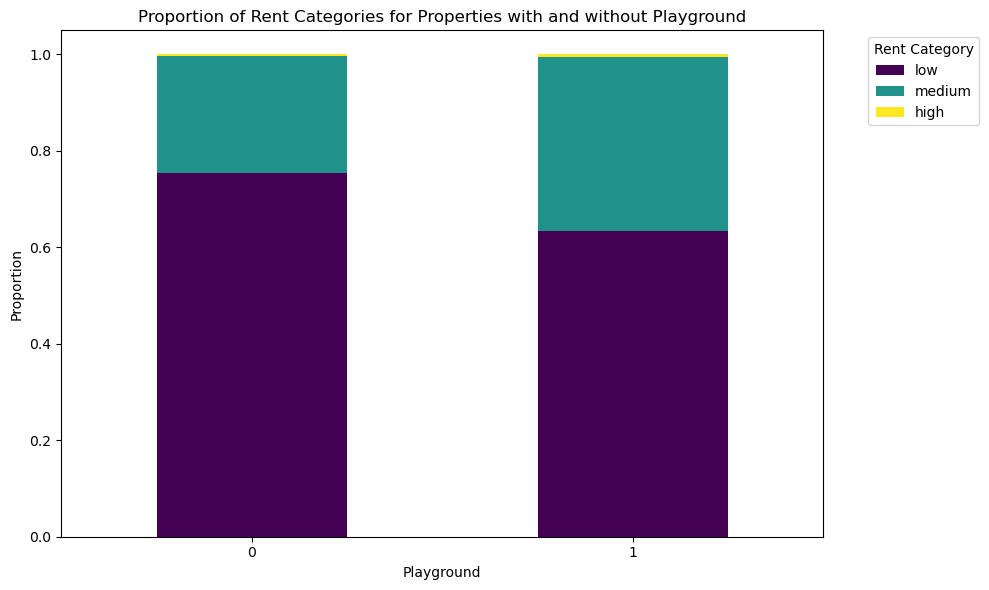

In [121]:
# Create a contingency table
contingency_table16 = pd.crosstab(rental2['Playground'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table16['Total'] = contingency_table16.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table16.loc['Total'] = contingency_table16.sum(axis=0)

# Display the contingency table
display(contingency_table16)

# Create a crosstab of the Barbeque area and rent_category
crosstab9 = pd.crosstab(rental2['Playground'], rental2['rent_category'], normalize='index')
display(crosstab9)

# Plot the stacked bar plot
crosstab9.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Playground')
plt.xlabel('Playground')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Sauna vs rent_category (bar plot)

rent_category,low,medium,high,Total
Sauna,,,,
0,8133,3060,29,11222
1,4863,3845,61,8769
Total,12996,6905,90,19991


rent_category,low,medium,high
Sauna,,,
0,0.724737,0.272679,0.002584
1,0.554567,0.438476,0.006956


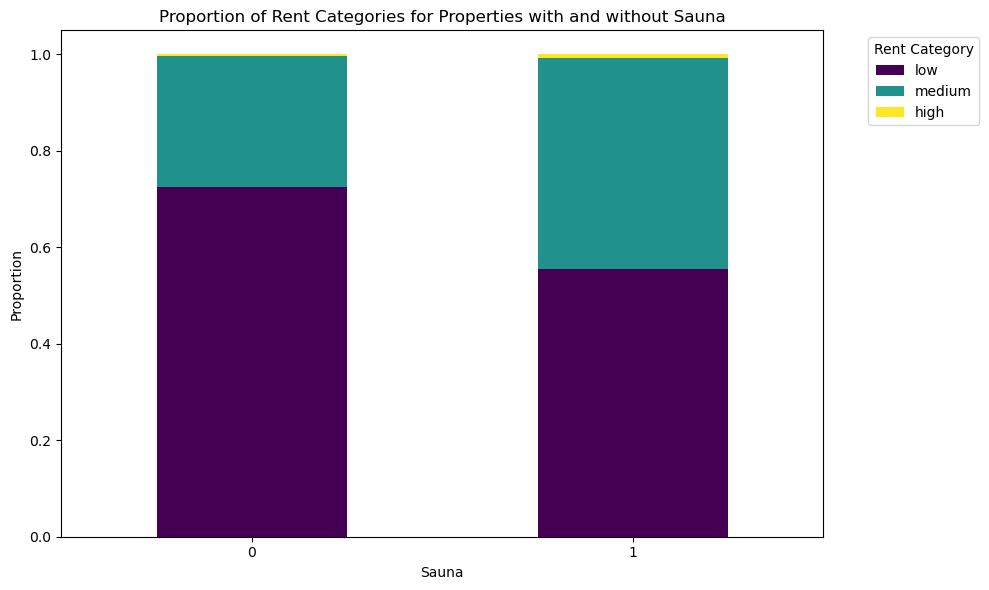

In [122]:
# Create a contingency table
contingency_table17 = pd.crosstab(rental2['Sauna'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table17['Total'] = contingency_table17.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table17.loc['Total'] = contingency_table17.sum(axis=0)

# Display the contingency table
display(contingency_table17)

# Create a crosstab of the Barbeque area and rent_category
crosstab10 = pd.crosstab(rental2['Sauna'], rental2['rent_category'], normalize='index')
display(crosstab10)

# Plot the stacked bar plot
crosstab10.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Sauna')
plt.xlabel('Sauna')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Security vs rent_category  (bar plot)

rent_category,low,medium,high,Total
Security,,,,
0,1278,216,9,1503
1,11718,6689,81,18488
Total,12996,6905,90,19991


rent_category,low,medium,high
Security,,,
0,0.850299,0.143713,0.005988
1,0.633817,0.361802,0.004381


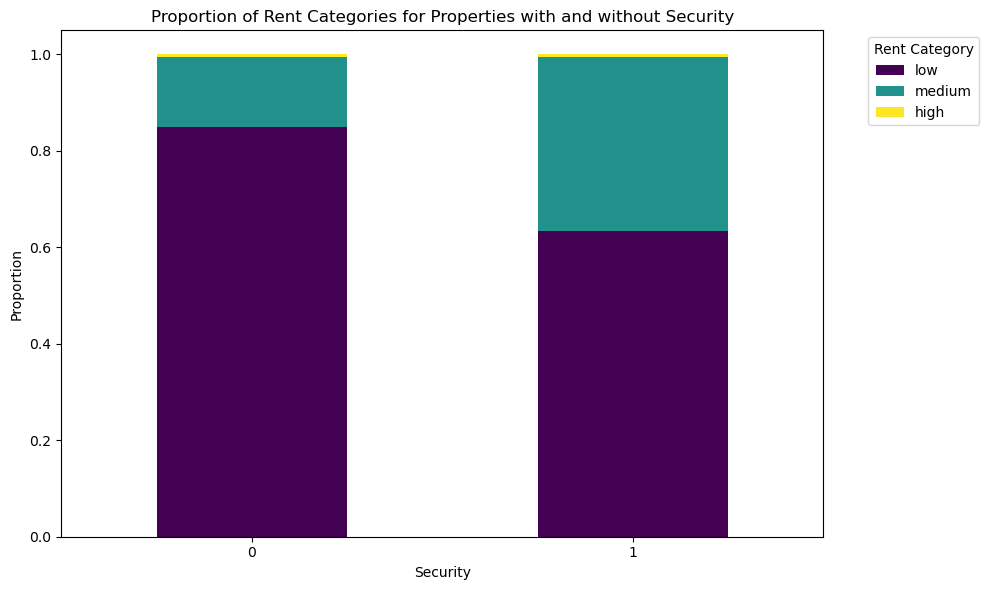

In [123]:
# Create a contingency table
contingency_table18 = pd.crosstab(rental2['Security'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table18['Total'] = contingency_table18.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table18.loc['Total'] = contingency_table18.sum(axis=0)

# Display the contingency table
display(contingency_table18)

# Create a crosstab of the Barbeque area and rent_category
crosstab11 = pd.crosstab(rental2['Security'], rental2['rent_category'], normalize='index')
display(crosstab11)

# Plot the stacked bar plot
crosstab11.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Security')
plt.xlabel('Security')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Squash Court vs rent_category (bar plot)

rent_category,low,medium,high,Total
Squash Court,,,,
0,9309,4369,45,13723
1,3687,2536,45,6268
Total,12996,6905,90,19991


rent_category,low,medium,high
Squash Court,,,
0,0.678350,0.318371,0.003279
1,0.588226,0.404595,0.007179


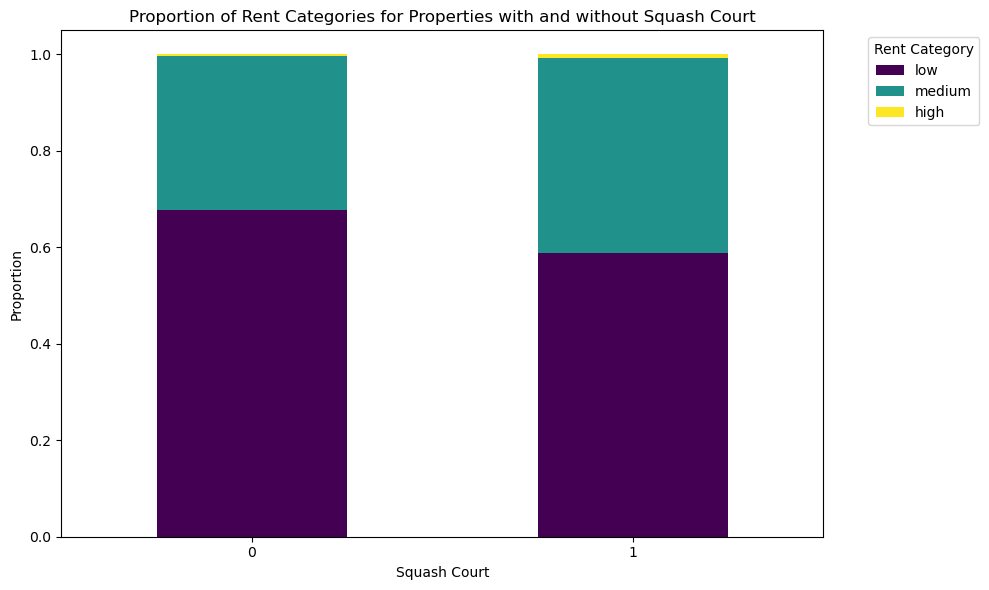

In [124]:
# Create a contingency table
contingency_table19 = pd.crosstab(rental2['Squash Court'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table19['Total'] = contingency_table19.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table19.loc['Total'] = contingency_table19.sum(axis=0)

# Display the contingency table
display(contingency_table19)

# Create a crosstab of the Barbeque area and rent_category
crosstab12 = pd.crosstab(rental2['Squash Court'], rental2['rent_category'], normalize='index')
display(crosstab12)

# Plot the stacked bar plot
crosstab12.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Squash Court')
plt.xlabel('Squash Court')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Swimming Pool vs rent_category (bar plot)

rent_category,low,medium,high,Total
Swimming Pool,,,,
0,3296,388,8,3692
1,9700,6517,82,16299
Total,12996,6905,90,19991


rent_category,low,medium,high
Swimming Pool,,,
0,0.892741,0.105092,0.002167
1,0.595129,0.399840,0.005031


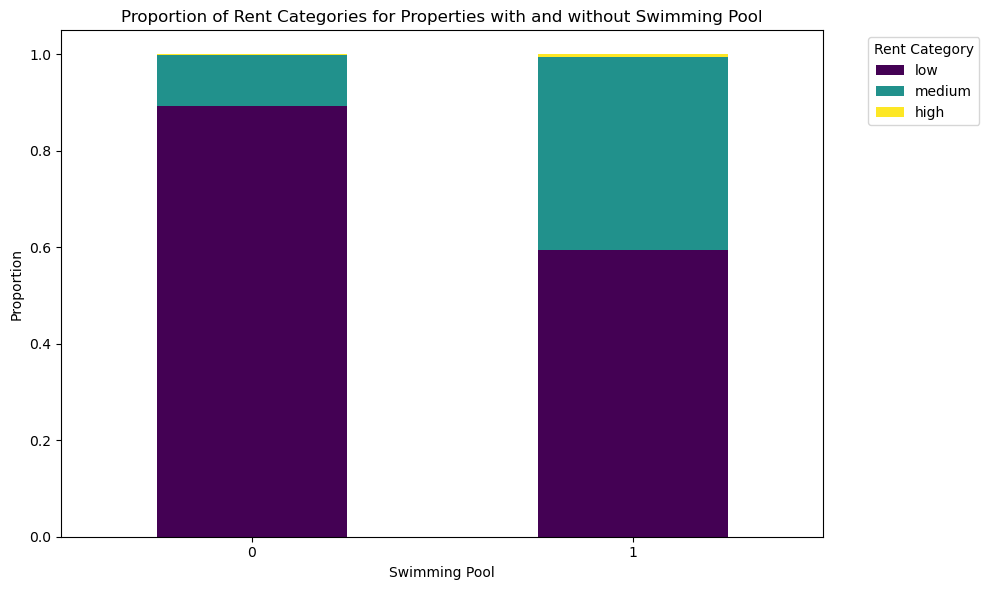

In [125]:
# Create a contingency table
contingency_table20 = pd.crosstab(rental2['Swimming Pool'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table20['Total'] = contingency_table20.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table20.loc['Total'] = contingency_table20.sum(axis=0)

# Display the contingency table
display(contingency_table20)

# Create a crosstab of the Barbeque area and rent_category
crosstab13 = pd.crosstab(rental2['Swimming Pool'], rental2['rent_category'], normalize='index')
display(crosstab13)

# Plot the stacked bar plot
crosstab13.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Swimming Pool')
plt.xlabel('Swimming Pool')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tennis Court vs rent_category  (bar plot)

rent_category,low,medium,high,Total
Tennis Court,,,,
0,9290,4335,41,13666
1,3706,2570,49,6325
Total,12996,6905,90,19991


rent_category,low,medium,high
Tennis Court,,,
0,0.679789,0.317211,0.003000
1,0.585929,0.406324,0.007747


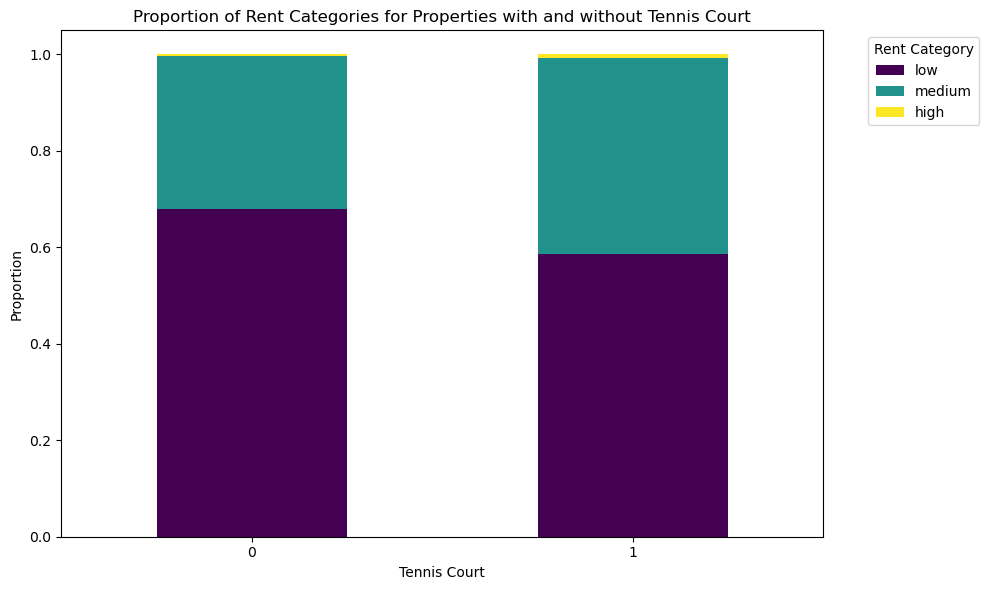

In [126]:
# Create a contingency table
contingency_table21 = pd.crosstab(rental2['Tennis Court'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table21['Total'] = contingency_table21.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table21.loc['Total'] = contingency_table21.sum(axis=0)

# Display the contingency table
display(contingency_table21)

# Create a crosstab of the Barbeque area and rent_category
crosstab14 = pd.crosstab(rental2['Tennis Court'], rental2['rent_category'], normalize='index')
display(crosstab14)

# Plot the stacked bar plot
crosstab14.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Tennis Court')
plt.xlabel('Tennis Court')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Air-Cond vs rent_category (bar plot)

rent_category,low,medium,high,Total
Playground,,,,
0,1980,634,11,2625
1,11016,6271,79,17366
Total,12996,6905,90,19991


rent_category,low,medium,high
Air-Cond,,,
0,0.919901,0.078866,0.001232
1,0.597790,0.397074,0.005136


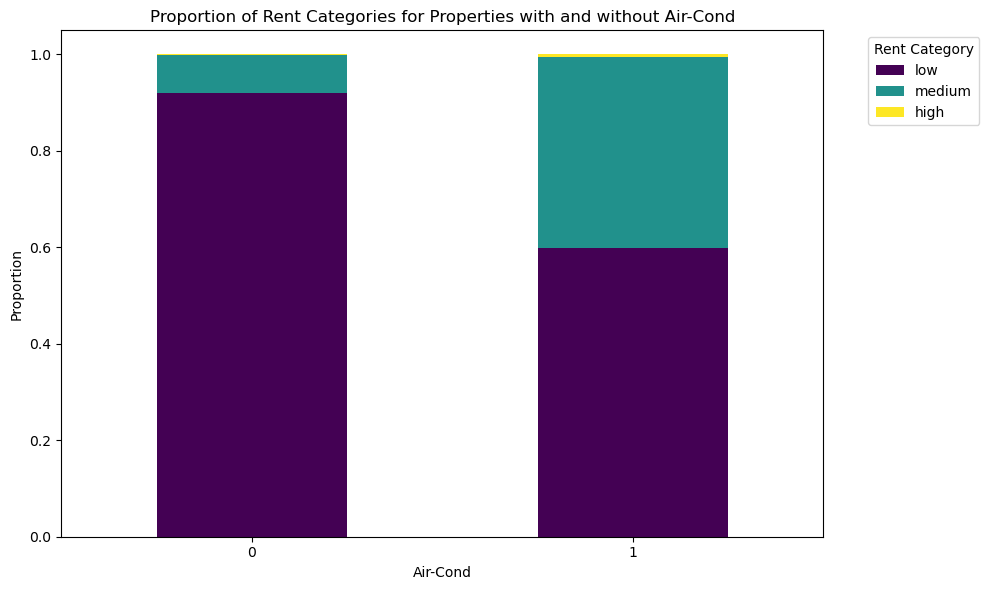

In [127]:
# Create a contingency table
contingency_table22 = pd.crosstab(rental2['Air-Cond'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table22['Total'] = contingency_table22.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table.loc['Total'] = contingency_table22.sum(axis=0)

# Display the contingency table
display(contingency_table16)

# Create a crosstab of the Barbeque area and rent_category
crosstab15 = pd.crosstab(rental2['Air-Cond'], rental2['rent_category'], normalize='index')
display(crosstab15)

# Plot the stacked bar plot
crosstab15.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Air-Cond')
plt.xlabel('Air-Cond')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Cooking Allowed vs rent_category  (bar plot)

rent_category,low,medium,high,Total
Cooking Allowed,,,,
0,874,320,7,1201
1,12122,6585,83,18790
Total,12996,6905,90,19991


rent_category,low,medium,high
Cooking Allowed,,,
0,0.727727,0.266445,0.005828
1,0.645130,0.350452,0.004417


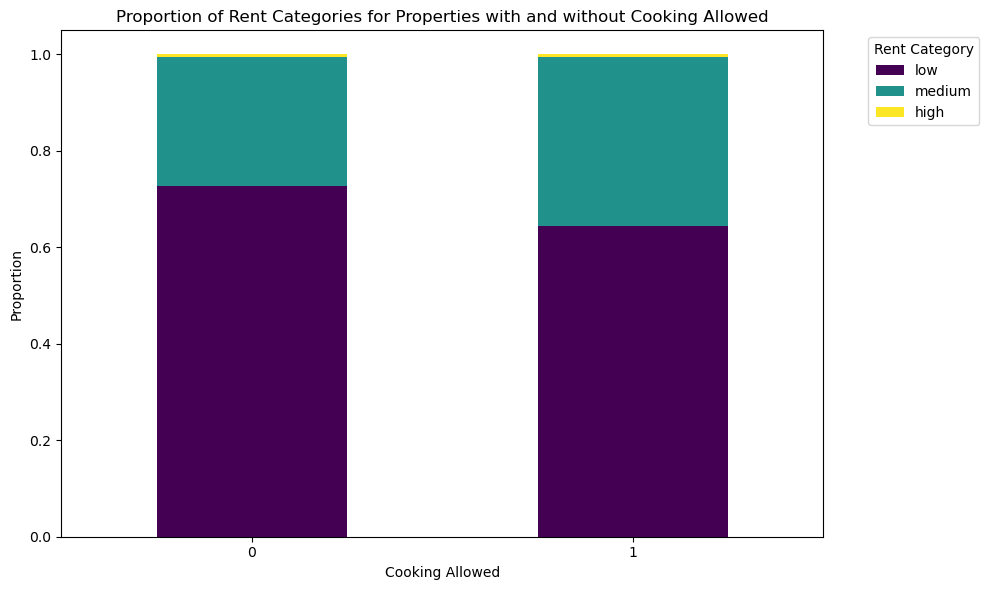

In [128]:
# Create a contingency table
contingency_table23 = pd.crosstab(rental2['Cooking Allowed'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table23['Total'] = contingency_table23.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table23.loc['Total'] = contingency_table23.sum(axis=0)

# Display the contingency table
display(contingency_table23)

# Create a crosstab of the Barbeque area and rent_category
crosstab16 = pd.crosstab(rental2['Cooking Allowed'], rental2['rent_category'], normalize='index')
display(crosstab16)

# Plot the stacked bar plot
crosstab16.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Cooking Allowed')
plt.xlabel('Cooking Allowed')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Internet vs rent_category (bar plot)

rent_category,low,medium,high,Total
Internet,,,,
0,11560,5861,65,17486
1,1436,1044,25,2505
Total,12996,6905,90,19991


rent_category,low,medium,high
Internet,,,
0,0.661100,0.335182,0.003717
1,0.573253,0.416766,0.009980


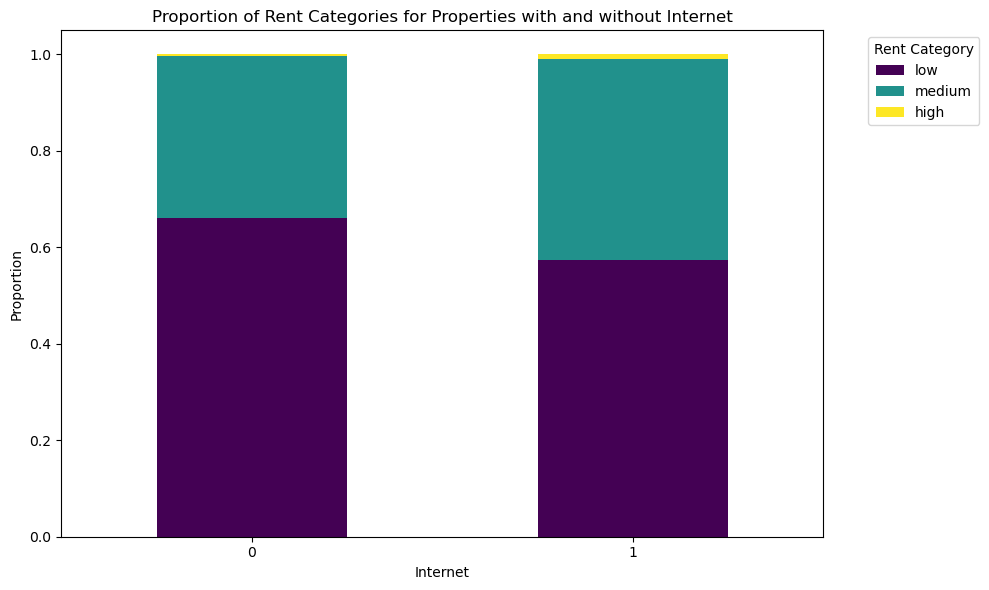

In [129]:
# Create a contingency table
contingency_table24 = pd.crosstab(rental2['Internet'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table24['Total'] = contingency_table24.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table24.loc['Total'] = contingency_table24.sum(axis=0)

# Display the contingency table
display(contingency_table24)

# Create a crosstab of the Barbeque area and rent_category
crosstab17 = pd.crosstab(rental2['Internet'], rental2['rent_category'], normalize='index')
display(crosstab17)

# Plot the stacked bar plot
crosstab17.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Internet')
plt.xlabel('Internet')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Near KTM/LRT vs rent_category  (bar plot)

rent_category,low,medium,high,Total
Near KTM/LRT,,,,
0,8378,4056,41,12475
1,4618,2849,49,7516
Total,12996,6905,90,19991


rent_category,low,medium,high
Near KTM/LRT,,,
0,0.671583,0.325130,0.003287
1,0.614423,0.379058,0.006519


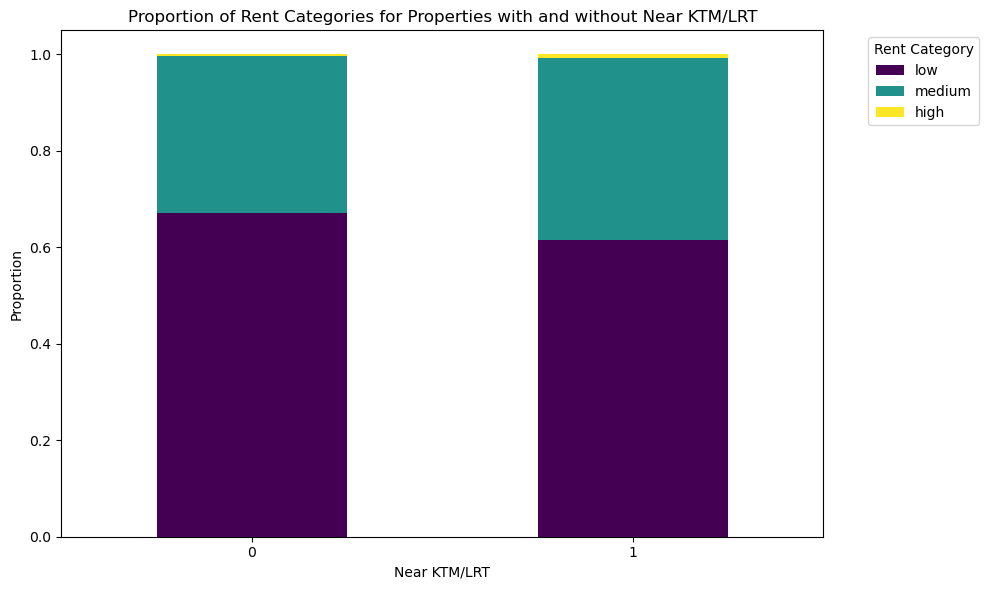

In [130]:
# Create a contingency table
contingency_table25 = pd.crosstab(rental2['Near KTM/LRT'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table25['Total'] = contingency_table25.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table25.loc['Total'] = contingency_table25.sum(axis=0)

# Display the contingency table
display(contingency_table25)

# Create a crosstab of the Barbeque area and rent_category
crosstab18 = pd.crosstab(rental2['Near KTM/LRT'], rental2['rent_category'], normalize='index')
display(crosstab18)

# Plot the stacked bar plot
crosstab18.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Near KTM/LRT')
plt.xlabel('Near KTM/LRT')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Washing Machine vs rent_category  (bar plot)

rent_category,low,medium,high,Total
Washing Machine,,,,
0,5327,1193,10,6530
1,7669,5712,80,13461
Total,12996,6905,90,19991


rent_category,low,medium,high
Washing Machine,,,
0,0.815773,0.182695,0.001531
1,0.569720,0.424337,0.005943


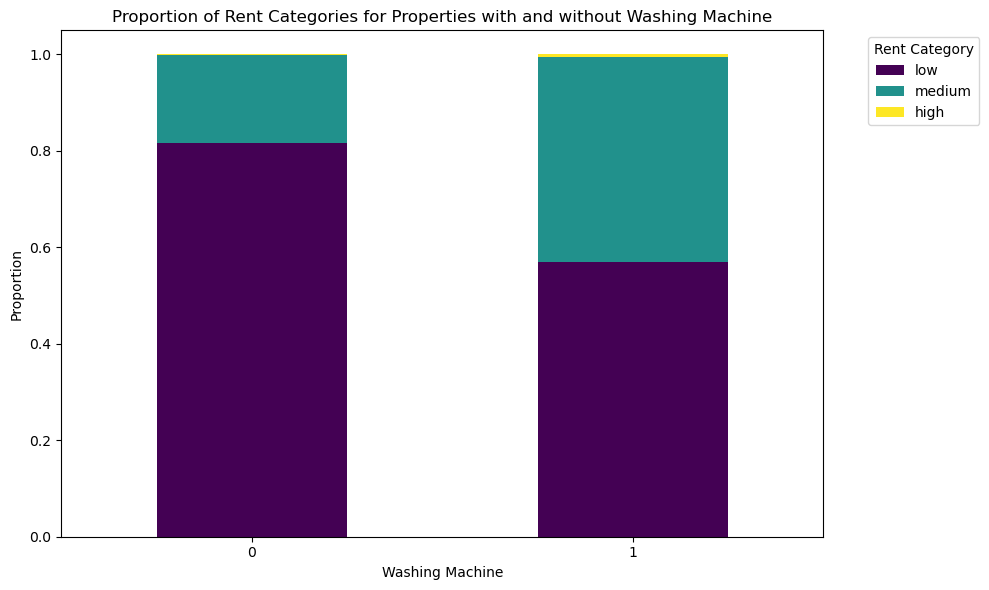

In [131]:
# Create a contingency table
contingency_table26 = pd.crosstab(rental2['Washing Machine'], rental2['rent_category'])

# Calculate row totals and add as a new column
contingency_table26['Total'] = contingency_table26.sum(axis=1)

# Calculate column totals and add as a new row
contingency_table26.loc['Total'] = contingency_table26.sum(axis=0)

# Display the contingency table
display(contingency_table26)

# Create a crosstab of the Barbeque area and rent_category
crosstab19 = pd.crosstab(rental2['Washing Machine'], rental2['rent_category'], normalize='index')

display(crosstab19)

# Plot the stacked bar plot
crosstab19.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Proportion of Rent Categories for Properties with and without Washing Machine')
plt.xlabel('Washing Machine')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Rent Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Heatmap (for correlation)

Heatmaps are a valuable tool for EDA, it helps in getting a quick overview of the dataset and identifying potential correlations/relationships/trends between variables

In [132]:
rental_encoded1 = rental2.copy()

In [133]:
rental_encoded1['location'] = rental_encoded1['location'].astype('category').cat.codes
rental_encoded1['property_type'] = rental_encoded1['property_type'].astype('category').cat.codes
rental_encoded1['furnished'] = rental_encoded1['furnished'].astype('category').cat.codes
rental_encoded1['rent_category'] = rental_encoded1['rent_category'].astype('category').cat.codes
rental_encoded1['size_bins'] = rental_encoded1['size_bins'].astype('category').cat.codes
rental_encoded1['region'] = rental_encoded1['region'].astype('category').cat.codes

In [134]:
# Normalize numerical variables
numerical_vars = ['completion_year', 'rooms', 'parking', 'bathroom', 'size_num_sf', "Barbeque area", "Club house", "Gymnasium", "Jogging Track", "Lift", "Minimart", "Multipurpose hall", "Parking", "Playground", "Sauna", "Security", "Squash Court", "Swimming Pool", "Tennis Court", "Air-Cond", "Cooking Allowed", "Internet", "Near KTM/LRT", "Washing Machine"]
scaler = StandardScaler()
rental_encoded1[numerical_vars] = scaler.fit_transform(rental_encoded1[numerical_vars])

In [135]:
# Drop unnecessary columns
rental_encoded1.drop(columns=['monthly_rent', 'facilities', 'additional_facilities', 'size'], inplace=True)

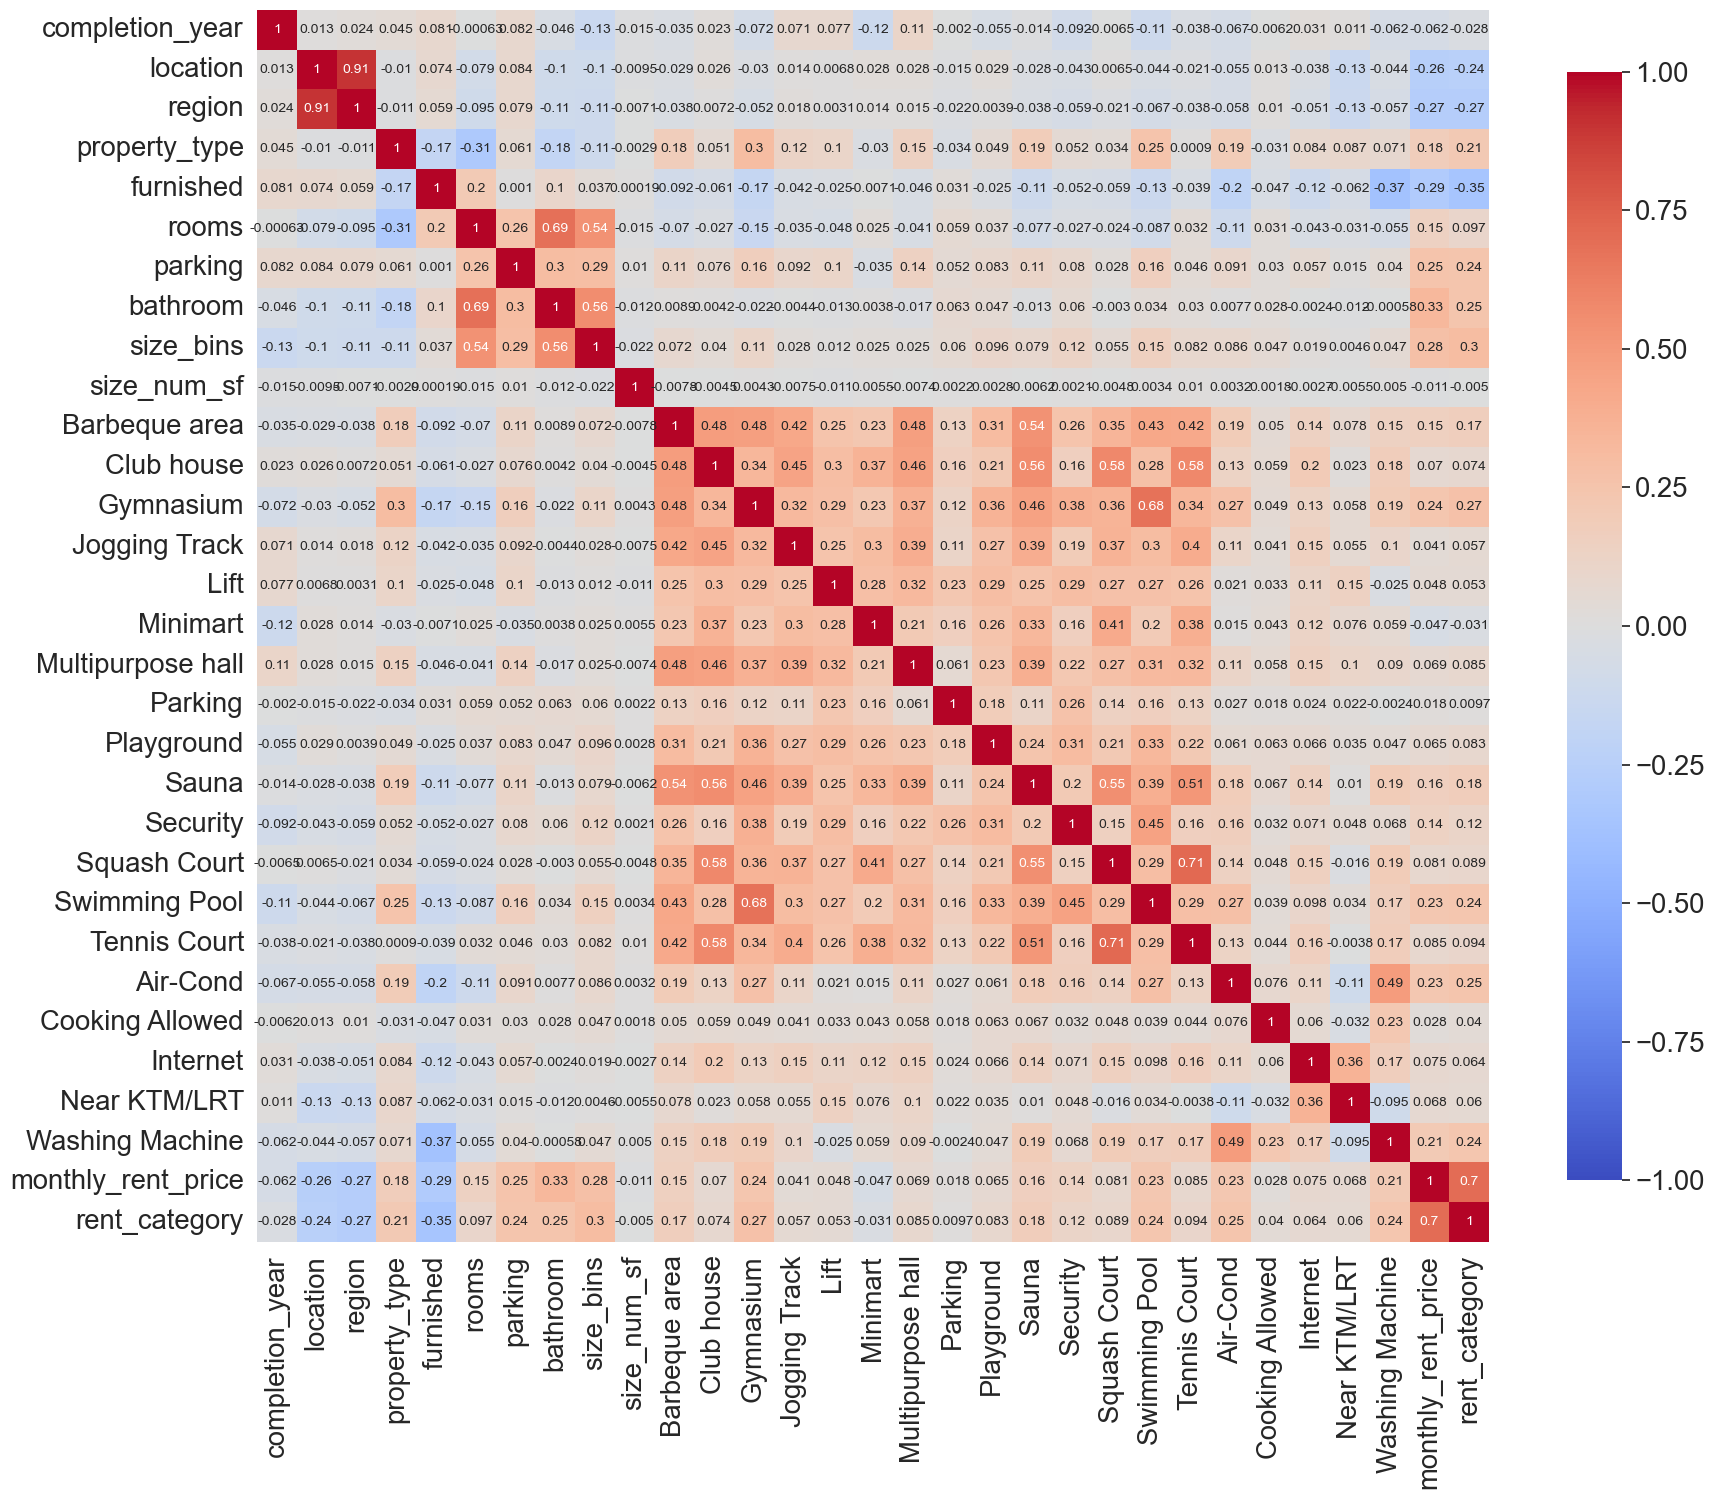

In [136]:
def plot_correlation_map( df ):
    sns.set(font_scale=1.8)
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 20 , 16 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = 'coolwarm',
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax,
        vmin=-1,
        annot = True, 
        annot_kws = { 'fontsize' : 10}
    )
plot_correlation_map( rental_encoded1[["completion_year", "location", "region", "property_type", "furnished", "rooms", "parking", "bathroom", "size_bins", "size_num_sf", "Barbeque area", "Club house", "Gymnasium", "Jogging Track", "Lift", "Minimart", "Multipurpose hall", "Parking", "Playground", "Sauna", "Security", "Squash Court", "Swimming Pool", "Tennis Court", "Air-Cond", "Cooking Allowed", "Internet", "Near KTM/LRT", "Washing Machine", "monthly_rent_price", "rent_category"]] )

#### Interpretation

*Parking is with or without parking
**parking is number of parking

#### Correlations with rent_category:

##### Correlations:

monthly_rent_price (0.70): Strongly correlated with rent_category, as expected since they are directly related

size_bins (0.3): Moderately correlated.

property_type (0.21):  Slightly  correlated.

bathroom (0.25):  Slightly  correlated.

rooms (0.097): Weak negative correlation.

parking (0.24): Slightly correlated.

##### Correlations:

furnished (-0.35): Weak negative correlation.

location (-0.24): Weak negative correlation.

Completion_year (-0.028): Weak negative correlation

Region (-0.24) -: Weak negative correlation


#### feature Correlations:

###### Positive Correlations:

Barbeque area and Gymnasium (0.48)

Air-cond and Washing Machine (0.49)

Gymnasium and Swimming pool (0.68)

rooms and bathroom (0.68)

Sauna and Tennis court (0.51)

Squash Court and Swimming Pool (0.71)

Swimming Pool and Tennis Court (0.59)

##### Negative Correlations:

Air-cond and MRT/LRT (-0.11)


#### Interpreting Specific Features:

Property_type: Positively correlated with Gymnasium (0.30 and swimming pool (0.25), but negatively correlated with furnished (-0.17), bathroom (-0.18) and size_bins (-0.11). Suggesting properties of a certain type (e.g., apartments) might be more likely to have amenities like gyms or swimming pools. Negative correlation, there might be a connection between property type and features like furnished status (-0.17), number of bathrooms (-0.18), or size (-0.11). For instance, apartments might tend to be less furnished, have fewer bathrooms, or be smaller than houses on average.

Rooms: Positively correlated with size_bins (0.54), bathroms(0.68), parking(0.25), but negatively correlated with property type (-0.31). For Positive correlations, as expected, there's a strong positive correlation between the number of rooms and the size of the property. Properties with more rooms are also likely to have more bathrooms and parking availability. The negative correlation with property type suggests that properties with more rooms might be less common in certain categories (e.g., apartments) compared to others (e.g., studio).

Parking: Positively correlated with bathroom (0.30), rooms (0.25), and size_bins( 0.29) suggesting properties with parking also have more bathrooms and rooms. There's also a positive correlation with property size (0.29).

Lift: Positively correlated with Gymnasium (0.29), Multipurpose hall (0.32), and Security (0.29), indicating a pattern where properties with lifts tend to have these amenities.

Furnished: Positively correlated with bathroom 0.10 and rooms(0.20). Although weak, there's a positive correlation between furnished properties and the number of bathrooms (0.10) and rooms (0.20). This might indicate that furnished properties tend to be larger or more luxurious.

Location: Negatively correlated with size_bins (0.10) and bathroom(0.10)  suggests that there might be a trend of smaller properties with fewer bathrooms in certain locations compared to others. 

#### Overall: Target Variable (rent_category)

Most significant feature for predicting rent_category are size_bins followed by bathroom, parking, property_type and rooms.

The weak correlation with other features suggests that rent_category is not strongly influenced by individual amenities but by a combination of various features.

## 3.3 Outliers

In [137]:
rental2.describe()

,completion_year,rooms,parking,bathroom,monthly_rent_price,Barbeque area,Club house,Gymnasium,Jogging Track,Lift,...,Security,Squash Court,Swimming Pool,Tennis Court,Air-Cond,Cooking Allowed,Internet,Near KTM/LRT,Washing Machine,size_num_sf
count,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,...,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,19991.000000,1.999100e+04
mean,2017.660697,2.678305,1.293932,1.881497,1612.019609,0.547797,0.292432,0.732129,0.531489,0.692862,...,0.924816,0.313541,0.815317,0.316392,0.837627,0.939923,0.125306,0.375969,0.673353,5.922172e+03
std,5.830898,0.799705,0.483590,0.516669,946.772801,0.497723,0.454891,0.442861,0.499020,0.461319,...,0.263694,0.463944,0.388050,0.465080,0.368802,0.237635,0.331074,0.484384,0.468999,7.072596e+05
min,1977.000000,1.000000,1.000000,1.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,2016.000000,2.000000,1.000000,2.000000,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000e+02
50%,2021.000000,3.000000,1.000000,2.000000,1400.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,8.860000e+02
75%,2021.000000,3.000000,2.000000,2.000000,1800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.044000e+03
max,2025.000000,6.000000,4.000000,4.000000,18500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08


C:\Users\Acer\AppData\Local\Temp\ipykernel_26004\3597197557.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rental2["monthly_rent_price"]);


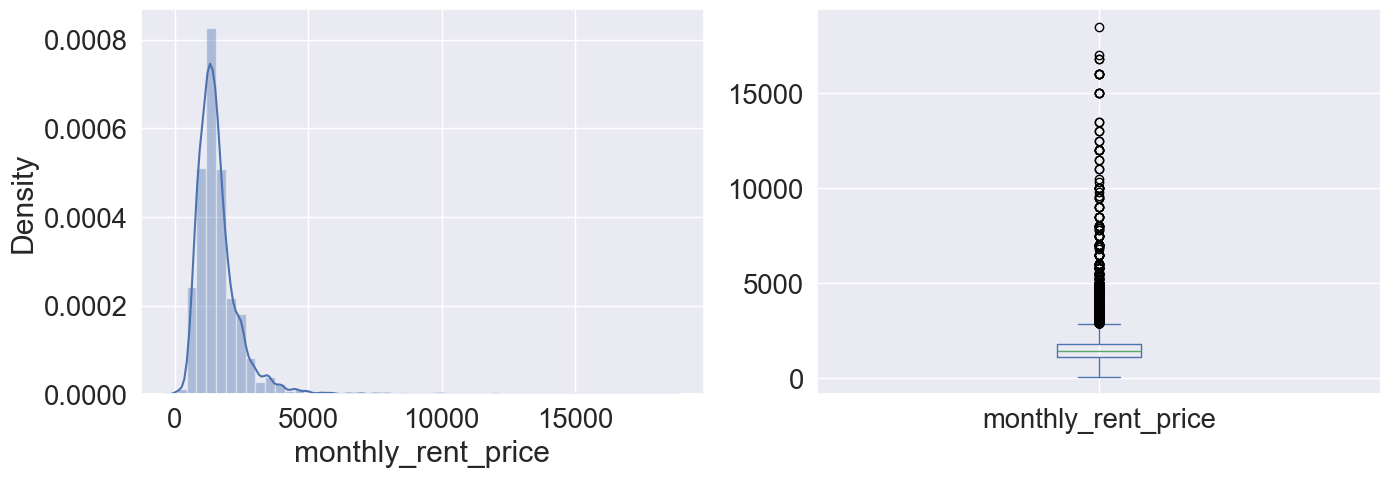

In [138]:
# create distribution plot and boxplot to check for outliers

plt.subplot(121)
sns.distplot(rental2["monthly_rent_price"]);

plt.subplot(122)
rental2["monthly_rent_price"].plot.box(figsize=(16,5))

plt.show()

Based on the summary statistics provided for monthly_rent_price, we can assess the presence of potential outliers, particularly by examining the minimum and maximum values alongside the interquartile range (IQR).

Therefore, based on the IQR method with a 1.5 multiplier (a common threshold for outlier detection):

•	The minimum value of 70 appears to be an outlier (since it's below the lower bound).
•	The maximum value of 18,500 is definitely an outlier (since it's far above the upper bound).

These outliers could potentially impact the models during the fitting since the upper bound is 2850. I did try to fit the models with and without the outliers. In models without the outlier, it removed the ‘High’ category. Hence, the outlier should be kept in this project.


## 4. Model the data

In [139]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Setting X and y

In [140]:
# Set features and target variable
features = ['completion_year', 'location', 'region', 'property_type', 'furnished', 'rooms', 'parking', 'bathroom', 'size_bins', 
            'Barbeque area', 'Club house', 'Gymnasium', 'Jogging Track', 'Lift', 'Minimart', 
            'Multipurpose hall', 'Parking', 'Playground', 'Sauna', 'Security', 'Squash Court', 
            'Swimming Pool', 'Tennis Court', 'Air-Cond', 'Cooking Allowed', 'Internet', 
            'Near KTM/LRT', 'Washing Machine']

X = rental_encoded1[features]  # Use square brackets to extract columns by their names

y = rental_encoded1['rent_category']  # Target variable

In [141]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# Instatiate StandardScaler and fit the training set
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [144]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Logistic Regression 

In [145]:
# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

In [146]:
# Fit the Logistic Regression model
logreg_model.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [147]:
logreg_model.score(X_train_sc, y_train)

0.8055277638819409

In [148]:
logreg_model.score(X_test_sc, y_test)

0.80320080020005

In [149]:
# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test_sc)

In [150]:
y_pred_logreg

array([1, 0, 1, ..., 1, 1, 0], dtype=int8)

In [151]:
cross_val_score(logreg_model, X_train_sc, y_train, cv = 5).mean()

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.8034014890128462

### Logistic Regression 2 (with parameters)

In [152]:
logreg_model2 = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

In [153]:
# Fit the Logistic Regression model
logreg_model2.fit(X_train_sc, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [154]:
logreg_model2.score(X_train_sc, y_train)

0.7288644322161081

In [155]:
logreg_model2.score(X_test_sc, y_test)

0.7171792948237059

In [156]:
# Predict on the test set
y_pred_logreg2 = logreg_model2.predict(X_test_sc)

In [157]:
y_pred_logreg2

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [158]:
cross_val_score(logreg_model2, X_train_sc, y_train, cv = 5).mean()

0.7263005891655088

### Logistic Regression 3 (GridSearchCV)

In [159]:
from sklearn.model_selection import GridSearchCV 

In [160]:
# Define the logistic regression model
logreg_model3 = LogisticRegression(random_state=42, max_iter=1000)

In [161]:
# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

In [162]:
# Initialize GridSearchCV
logreg_grid_search = GridSearchCV(logreg_model3, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

In [163]:
logreg_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1_weighted')

In [164]:
# Best model
logreg_grid_search.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [165]:
# Best parameters
logreg_grid_search.best_params_

{'C': 0.1, 'solver': 'lbfgs'}

In [166]:
# Best estimator
logreg_model4 = logreg_grid_search.best_estimator_

In [167]:
logreg_model4.fit(X_train_sc, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [168]:
# Evaluate on train set
logreg_model4.score(X_train_sc, y_train)

0.8056528264132066

In [169]:
# Evaluate on test set
logreg_model4.score(X_test_sc, y_test)

0.8024506126531633

In [170]:
# Predict on the test set
y_pred_logreg4 = logreg_model4.predict(X_test_sc)

In [171]:
y_pred_logreg4

array([1, 0, 1, ..., 1, 1, 0], dtype=int8)

In [172]:
cross_val_score(logreg_model4, X_train_sc, y_train).mean()

0.8037141257987711

Overall

The train, test, and cross-validation scores are very close, indicating good generalization and minimal overfitting or underfitting.

The model is stable and performs consistently across different datasets.



### Decision Tree

In [180]:
# Instantiate the model
dt_model = DecisionTreeClassifier(random_state = 42)

In [181]:
# Fit the Decision Tree model
dt_model.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [182]:
dt_model.score(X_train_sc, y_train)

0.9890570285142571

In [183]:
dt_model.score(X_test_sc, y_test)

0.8404601150287572

In [184]:
# Predict on the test set
y_pred_dt = dt_model.predict(X_test_sc)

In [185]:
y_pred_dt

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [186]:
cross_val_score(dt_model, X_train_sc, y_train).mean()

0.8528640223522007

Interpretation

This model achieves a very high training score (almost 0.99) but a significantly lower test score (around 0.84) and cross-validation score. 

This large gap suggests significant overfitting.



### Decision Tree 2 (with parameters)

In [187]:
# Instantiate model with:
# - a maximum depth of 5.
# - at least 7 samples required in order to split an internal node.
# - at least 3 samples in each leaf node.
# - a cost complexity of 0.01.
# - random state of 42.

dt_model2 = DecisionTreeClassifier(max_depth = 5,
                            min_samples_split = 7,
                            min_samples_leaf = 3,
                            ccp_alpha = 0.01,
                            random_state = 42)

In [188]:
dt_model2.fit(X_train_sc, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=3,
                       min_samples_split=7, random_state=42)

In [189]:
dt_model2.score(X_train_sc, y_train)

0.7719484742371185

In [190]:
dt_model2.score(X_test_sc, y_test)

0.7694423605901476

In [191]:
# Predict on the test set
y_pred_dt2 = dt_model2.predict(X_test_sc)

In [192]:
cross_val_score(dt_model2, X_train_sc, y_train).mean()

0.7719485705449307

Interpretation

This model with specific parameters has lower scores across the board compared to DT 1 and DT 3. 

It might be underfitting due to restrictive parameters.


### Decision Tree 3 (GridSearchCV)

In [193]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
dt_param_grid = {
    'max_depth': [5, 10, 20], # This controls the maximum depth of each tree to allows exploring trees with varying levels of complexity.
    'min_samples_split': [3, 7, 10], # Higher values can lead to less complex trees, potentially reducing overfitting and vice versa. Start from low value and gradually increase the value.
    'min_samples_leaf': [3, 7, 10], # Higher values can lead to simpler trees with fewer leaf nodes, potentially reducing overfitting and vice versa. Start from low value and gradually increase the value.
    'ccp_alpha': [0.001, 0.015, 0.02] # To reduce complexity and maximize testing accuracy
}

In [194]:
# Perform grid search with cross-validation
dt_model3= DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt_model3, dt_param_grid, cv=5, scoring='f1_weighted')

In [195]:
# Fit the model
dt_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.015, 0.02],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [3, 7, 10],
                         'min_samples_split': [3, 7, 10]},
             scoring='f1_weighted')

In [196]:
# Best model
dt_grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=10,
                       min_samples_split=3, random_state=42)

In [197]:
dt_grid_search.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 3}

In [198]:
dt_model4 = dt_grid_search.best_estimator_

In [199]:
dt_model4.fit(X_train_sc, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=10,
                       min_samples_split=3, random_state=42)

In [200]:
# Evaluate on train set
dt_model4.score(X_train_sc, y_train)

0.8192221110555278

In [201]:
# Evaluate on test set
dt_model4.score(X_test_sc, y_test)

0.8069517379344836

In [202]:
# Predict on the test set
y_pred_dt4 = dt_model4.predict(X_test_sc)

In [203]:
cross_val_score(dt_model4, X_train_sc, y_train).mean()

0.8108431320685151

This model uses GridSearchCV for hyperparameter tuning and achieves a balance between training and test scores (around 0.8) with decent cross-validation performance. Decision Tree shows almost similar training score to the test score. This indicates it generalizes well to unseen data. The cross-validation score is also close to the training and test scores, reinforcing that the model is neither overfitting nor underfitting.

### Random Forest

In [214]:
# Initialize 
rf_model = RandomForestClassifier(random_state=42)

In [215]:
# Fit the Random Forest model
rf_model.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=42)

In [216]:
rf_model.score(X_train_sc, y_train)

0.9889944972486243

In [217]:
rf_model.score(X_test_sc, y_test)

0.8832208052013003

In [218]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_sc)

In [219]:
y_pred_rf 

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [220]:
cross_val_score(rf_model, X_train_sc, y_train).mean()

0.8825034636957569

Interpretation

The train score is significantly higher than the test score, suggesting an overfitting. 

### Random Forest 2 (with parameters)

In [221]:
rf_model2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42)

In [222]:
rf_model2.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [223]:
rf_model2.score(X_train_sc, y_train)

0.8683716858429215

In [224]:
rf_model2.score(X_test_sc, y_test)

0.8467116779194799

In [225]:
# Predict on the test set
y_pred_rf2 = rf_model2.predict(X_test_sc)

In [226]:
y_pred_rf2

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [227]:
cross_val_score(rf_model2, X_train_sc, y_train).mean()

0.8491747636114397

Interpretation

The chosen hyperparameters for this model might be too restrictive as the scores are lower than RF 1. 

The gap between training and test scores is smaller than RF 1.


### Random Forest 3 (GridsearchCV)

In [348]:
# Define the parameter grid
rf_param_grid = {
    'n_estimators': [300, 330, 350], # Increasing the number of trees generally improves model performance by reducing variance
    'max_depth': [15, 20, 25], # Deeper trees can capture more complex relationships in the data but are also more prone to overfitting and vice versa
    'min_samples_split': [20, 25, 30], # Higher values can lead to less complex forests with fewer trees and potentially reduced overfitting, but might discard useful information
    'min_samples_leaf': [15, 20, 25], #  Higher values can lead to simpler trees with fewer leaf nodes, potentially reducing overfitting
    'max_features': ['sqrt', 'log2']
}

In [349]:
# Instantiate the model with class_weight='balanced'
rf_model3 = RandomForestClassifier(random_state=42, class_weight='balanced')

In [350]:
# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(rf_model3, rf_param_grid, cv=5, scoring='f1_weighted')

In [351]:
# Fit model
rf_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [20, 25, 30],
                         'n_estimators': [300, 330, 350]},
             scoring='f1_weighted')

In [352]:
# Best cross_val
rf_grid_search.best_score_

0.8345171870224648

In [353]:
# Best model
rf_grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=15, min_samples_split=20,
                       n_estimators=330, random_state=42)

In [354]:
rf_grid_search.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 20,
 'n_estimators': 330}

In [355]:
rf_model4 = rf_grid_search.best_estimator_

In [356]:
rf_model4.fit(X_train_sc, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=15, min_samples_split=20,
                       n_estimators=330, random_state=42)

In [357]:
# Evaluate on train set
rf_model4.score(X_train_sc, y_train)

0.8495497748874438

In [358]:
# Evaluate on test set
rf_model4.score(X_test_sc, y_test)

0.8304576144036009

In [359]:
# Predict on the test set
y_pred_rf4 = rf_model4.predict(X_test_sc)

In [360]:
y_pred_rf4

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [361]:
cross_val_score(rf_model4, X_train_sc, y_train).mean()

0.8303528443945799

Interpretation

This model achieves a balance between training and test scores (around 0.83-0.85) with decent cross-validation performance, demonstrating the benefit of hyperparameter tuning.

The hyperparameters configuration helps the model learn effectively without overfitting significantly.



### Gradient Boosting

In [256]:
# Initialize 
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

In [257]:
# Fit the Gradient Boosting model
gb_model.fit(X_train_sc, y_train)

GradientBoostingClassifier(random_state=42)

In [258]:
# Train the model
gb_model.score(X_train_sc, y_train)

0.8654327163581791

In [259]:
# Test the model
gb_model.score(X_test_sc, y_test)

0.8522130532633159

In [260]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test_sc)

In [261]:
print(y_pred_gb)

[1 1 1 ... 1 1 0]


In [262]:
# Evaluate the score
cross_val_score(gb_model, X_train_sc, y_train).mean()

0.854301913062654

Interpretation

The train, test, and cross-validation scores are very close, indicating good generalization and minimal overfitting or underfitting.

The model is stable and performs consistently across different datasets.



### Gradient Boosting 2 (with parameters)

In [263]:
gb_model2 = GradientBoostingClassifier(random_state=42, learning_rate=0.06, max_depth=5, n_estimators=200, subsample=0.95)

In [264]:
gb_model2.fit(X_train_sc, y_train)

GradientBoostingClassifier(learning_rate=0.06, max_depth=5, n_estimators=200,
                           random_state=42, subsample=0.95)

In [265]:
gb_model2.score(X_train_sc, y_train)

0.9129564782391195

In [266]:
gb_model2.score(X_test_sc, y_test)

0.8779694923730933

In [267]:
# Predict on the test set
y_pred_gb2 = gb_model.predict(X_test_sc)

In [268]:
print(y_pred_gb2)

[1 1 1 ... 1 1 0]


In [269]:
cross_val_score(gb_model2, X_train_sc, y_train).mean()

0.8825661005305558

Interpretation:

The high train score than the test suggests the model has an overfitting


### Gradient Boosting 3 (GridSearchCV)

In [317]:
# Define the parameter grid
gb_param_grid = {
    'n_estimators': [150, 200, 250], # Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance
    'learning_rate': [0.06, 0.08, 0.09], # Start with a small learning rate to avoid overshooting and instability.
    'max_depth': [3, 4, 5], # the default is 3, Gradient Boosting can often benefit from deeper trees (bigger number)
    'subsample': [0.55, 0.75, 0.95], # must be in between 0.0 to 1.0, <1.0 will lead to decrease in variance and increase in bias, we would want to avoid that
}

In [318]:
# Perform grid search with cross-validation
gb_model3 = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_model3, gb_param_grid, cv=5, scoring='f1_weighted')

In [319]:
# Fit model
gb_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.06, 0.08, 0.09],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [150, 200, 250],
                         'subsample': [0.55, 0.75, 0.95]},
             scoring='f1_weighted')

In [320]:
# Best model
gb_grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.09, max_depth=5, n_estimators=250,
                           random_state=42, subsample=0.75)

In [321]:
gb_grid_search.best_params_

{'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.75}

In [322]:
gb_model4 = gb_grid_search.best_estimator_

In [323]:
gb_model4.fit(X_train_sc, y_train)

GradientBoostingClassifier(learning_rate=0.09, max_depth=5, n_estimators=250,
                           random_state=42, subsample=0.75)

In [324]:
# Evaluate on train set
gb_model4.score(X_train_sc, y_train)

0.9365932966483241

In [325]:
# Evaluate on test set
gb_model4.score(X_test_sc, y_test)

0.8907226806701676

In [326]:
# Predict on the test set
y_pred_gb4 = gb_model4.predict(X_test_sc)

In [327]:
y_pred_gb4

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [328]:
cross_val_score(gb_model4, X_train_sc, y_train).mean()

0.8921335447033265

Interpret

The training score (0.93) is significantly higher than previous GB models and higher than the test score(0.89) , suggesting an overfitting. The model might be learning training data specifics too well and may not generalize well to unseen data.

The test score (0.89) and cross-validation score (0.89) are similar, indicating potential for reasonable generalizability despite the overfitting.




### GBR 1

### Resampling with SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN


# Apply SMOTE and ENN (Edited Nearest Neighbors)
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train_sc, y_train)

In [364]:
# Instantiate the model 
gb_model_res = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model_res.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

In [365]:
# Evaluate on train set
train_score_gb_res = gb_model_res.score(X_train_res, y_train_res)
print("Train Score:", train_score_gb_res)

# Predict on the train set
y_train_pred_gb_res = gb_model_res.predict(X_train_res)

Train Score: 0.954559553349876


In [366]:
# Evaluate on test set
test_score_gb_res = gb_model_res.score(X_test_sc, y_test)
print("Test Score:", test_score_gb_res)

# Predict on the test set
y_pred_gb_res = gb_model_res.predict(X_test_sc)

Test Score: 0.8242060515128782


In [367]:
# Cross-validation score
cv_score_gb_res = cross_val_score(gb_model_res, X_train_res, y_train_res).mean()
print("Cross-validation Score:", cv_score_gb_res)

Cross-validation Score: 0.9502561468902698


### GBR 2
### Resampling with SMOTEENN with weight

In [368]:
# Instantiate the model with class_weight='balanced'
gb2_model_res = GradientBoostingClassifier(random_state=42)

In [369]:
from sklearn.utils.class_weight import compute_sample_weight

# Fit the model
gb2_model_res.fit(X_train_res, y_train_res, sample_weight=compute_sample_weight('balanced', y_train_res))

GradientBoostingClassifier(random_state=42)

In [370]:
# Evaluate on train set
train_score_gb2_res = gb2_model_res.score(X_train_res, y_train_res)
print("Train Score:", train_score_gb2_res)

# Predict on the train set
y_train_pred_gb2_res = gb2_model_res.predict(X_train_res)

Train Score: 0.955373759305211


In [371]:
# Evaluate on test set
test_score_gb2_res = gb2_model_res.score(X_test_sc, y_test)
print("Test Score:", test_score_gb2_res)

# Predict on the test set
y_pred_gb2_res = gb2_model_res.predict(X_test_sc)

Test Score: 0.8242060515128782


In [372]:
# Cross-validation score
cv_score_gb2_res = cross_val_score(gb2_model_res, X_train_res, y_train_res).mean()
print("Cross-validation Score:", cv_score_gb2_res)

Cross-validation Score: 0.9502561468902698


### GBR 3

### Resampling with SMOTEENN with Parameter

In [375]:
# Instantiate the model with class_weight='balanced'
gb3_model_res = GradientBoostingClassifier(random_state=42, learning_rate=0.06, max_depth=5, n_estimators=200, subsample=0.95)

In [376]:
from sklearn.utils.class_weight import compute_sample_weight

# Fit the model
gb3_model_res.fit(X_train_res, y_train_res, sample_weight=compute_sample_weight('balanced', y_train_res))

GradientBoostingClassifier(learning_rate=0.06, max_depth=5, n_estimators=200,
                           random_state=42, subsample=0.95)

In [377]:
# Evaluate on train set
train_score_gb3_res = gb3_model_res.score(X_train_res, y_train_res)
print("Train Score:", train_score_gb3_res)

Train Score: 0.987205334987593


In [378]:
# Predict on the train set
y_train_pred_gb3_res = gb3_model_res.predict(X_train_res)

In [379]:
# Evaluate on test set
test_score_gb3_res = gb3_model_res.score(X_test_sc, y_test)
print("Test Score:", test_score_gb3_res)

# Predict on the test set
y_pred_gb3_res = gb3_model_res.predict(X_test_sc)

Test Score: 0.854463615903976


In [380]:
# Cross-validation score
cv_score_gb3_res = cross_val_score(gb3_model_res, X_train_res, y_train_res).mean()
print("Cross-validation Score:", cv_score_gb3_res)

Cross-validation Score: 0.9747988453416336


### GBR 4

### Resampling with SMOTEENN with weight and Parameter from GB 3

In [391]:
# # Fit the best Gradient Boosting model on the resampled data
gb4_model_res = gb_grid_search.best_estimator_ 

In [392]:
gb4_model_res.fit(X_train_res, y_train_res, sample_weight=compute_sample_weight('balanced', y_train_res))

GradientBoostingClassifier(learning_rate=0.09, max_depth=5, n_estimators=250,
                           random_state=42, subsample=0.75)

In [393]:
# Evaluate on train set
train_score_gb4_res = gb4_model_res.score(X_train_res, y_train_res)
print("Train Score:", train_score_gb4_res)

# Predict on the train set
y_train_pred_gb4_res = gb4_model_res.predict(X_train_res)

Train Score: 0.9959677419354839


In [394]:
# Evaluate on test set
test_score_gb4_res = gb4_model_res.score(X_test_sc, y_test)
print("Test Score:", test_score_gb4_res)

# Predict on the test set
y_pred_gb4_res = gb4_model_res.predict(X_test_sc)

Test Score: 0.8654663665916479


In [396]:
# Cross-validation score
cv_score_gb4_res = cross_val_score(gb4_model_res, X_train_res, y_train_res).mean()
print("Cross-validation Score:", cv_score_gb4_res)

Cross-validation Score: 0.9832510425919881


## 5. Evaluate the model.

In [297]:
# Import
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [298]:
def f1_scorer(model, X_train_sc, X_test_sc, y_train, y_test):
  f1_train = f1_score(y_true=y_train, y_pred=model.predict(X_train_sc), average='micro')  # Choose the appropriate averaging strategy
  f1_test = f1_score(y_true=y_test, y_pred=model.predict(X_test_sc), average='micro')  # Choose the appropriate averaging strategy

  print("The training F1-score for " + str(model.__class__.__name__) + " is: " + str(f1_train))
  print("The testing F1-score for " + str(model.__class__.__name__) + " is: " + str(f1_test))
  print()

### Logistic Regression_model 1 (no parameter)

In [299]:
# Generate the confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg, labels=logreg_model.classes_)
print("Confusion Matrix:\n", conf_matrix_logreg)

# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report Logreg:\n", classification_report(y_test, y_pred_logreg, target_names=target_names))

# Calculate the Matthews Correlation Coefficient
mcc_logreg = matthews_corrcoef(y_test, y_pred_logreg)
print("Matthews Correlation Coefficient:", mcc_logreg)

# Binarize the output labels for ROC AUC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes (0: low, 1: medium, 2: high)

# ROC AUC
y_pred_prob_logreg = logreg_model.predict_proba(X_test_sc)
roc_auc_logreg = roc_auc_score(y_test_bin, y_pred_prob_logreg, multi_class='ovr')
print(f"ROC AUC Score for Logistic Regression: {roc_auc_logreg}")

f1_scorer(logreg_model, X_train_sc, X_test, y_train, y_test)

Confusion Matrix:
 [[2303  276    0]
 [ 497  902    6]
 [   1    7    7]]
Classification Report Logreg:
               precision    recall  f1-score   support

         low       0.82      0.89      0.86      2579
      medium       0.76      0.64      0.70      1405
        high       0.54      0.47      0.50        15

    accuracy                           0.80      3999
   macro avg       0.71      0.67      0.68      3999
weighted avg       0.80      0.80      0.80      3999

Matthews Correlation Coefficient: 0.5613304974067945
ROC AUC Score for Logistic Regression: 0.9045622547255651
The training F1-score for LogisticRegression is: 0.8055277638819409
The testing F1-score for LogisticRegression is: 0.3650912728182045



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Logistics Regression_model 2 (with parameter)

In [300]:
# Generate the confusion matrix
conf_matrix_logreg2 = confusion_matrix(y_test, y_pred_logreg2, labels=logreg_model2.classes_)
print("Confusion Matrix:\n", conf_matrix_logreg2)

# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report Logreg2:\n", classification_report(y_test, y_pred_logreg2, target_names=target_names))

#Calculate the Matthews Correlation Coefficient
mcc_logreg2 = matthews_corrcoef(y_test, y_pred_logreg2)
print("Matthews Correlation Coefficient:", mcc_logreg2)

# Binarize the output labels for ROC AUC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes (0: low, 1: medium, 2: high)

# ROC AUC
y_pred_prob_logreg2 = logreg_model2.predict_proba(X_test_sc)
roc_auc_logreg2 = roc_auc_score(y_test_bin, y_pred_prob_logreg2, multi_class='ovr')
print(f"ROC AUC Score for Logistic Regression: {roc_auc_logreg2}")

#F1_score
f1_scorer(logreg_model2, X_train_sc, X_test, y_train, y_test)

Confusion Matrix:
 [[1941  567   71]
 [ 288  913  204]
 [   0    1   14]]
Classification Report Logreg2:
               precision    recall  f1-score   support

         low       0.87      0.75      0.81      2579
      medium       0.62      0.65      0.63      1405
        high       0.05      0.93      0.09        15

    accuracy                           0.72      3999
   macro avg       0.51      0.78      0.51      3999
weighted avg       0.78      0.72      0.74      3999

Matthews Correlation Coefficient: 0.45289743559226064
ROC AUC Score for Logistic Regression: 0.8812988874423476
The training F1-score for LogisticRegression is: 0.7288644322161082
The testing F1-score for LogisticRegression is: 0.3900975243810953



C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Logistics Regression_model 3 (with GridSearchCV)

In [301]:
# Generate the confusion matrix
conf_matrix_logreg4 = confusion_matrix(y_test, y_pred_logreg4, labels=logreg_model4.classes_)
print("Confusion Matrix:\n", conf_matrix_logreg4)

# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report Logreg4:\n", classification_report(y_test, y_pred_logreg4, target_names=target_names))

# Calculate the Matthews Correlation Coefficient
mcc_logreg4 = matthews_corrcoef(y_test, y_pred_logreg4)
print("Matthews Correlation Coefficient:", mcc_logreg4)

# Binarize the output labels for ROC AUC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes (0: low, 1: medium, 2: high)

# ROC AUC
y_pred_prob_logreg4 = logreg_model4.predict_proba(X_test_sc)
roc_auc_logreg4 = roc_auc_score(y_test_bin, y_pred_prob_logreg4, multi_class='ovr')
print(f"ROC AUC Score for Logistic Regression: {roc_auc_logreg4}")

#F1_score
f1_scorer(logreg_model4, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_logreg_model4 = f1_score(y_test, y_pred_logreg4, average='weighted')
print("Weighted F1 Score:", f1_weighted_logreg_model4)

Confusion Matrix:
 [[2303  276    0]
 [ 500  899    6]
 [   1    7    7]]
Classification Report Logreg4:
               precision    recall  f1-score   support

         low       0.82      0.89      0.86      2579
      medium       0.76      0.64      0.70      1405
        high       0.54      0.47      0.50        15

    accuracy                           0.80      3999
   macro avg       0.71      0.67      0.68      3999
weighted avg       0.80      0.80      0.80      3999

Matthews Correlation Coefficient: 0.5595316279031141
ROC AUC Score for Logistic Regression: 0.9033694098105287
The training F1-score for LogisticRegression is: 0.8056528264132066
The testing F1-score for LogisticRegression is: 0.36659164791197807

Weighted F1 Score: 0.7978826281796786


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Decision Tree_model 1 (no parameter)

In [302]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
print("Confusion Matrix:\n", conf_matrix_dt)

# Classification Report
print("Classification Report DT1:\n", classification_report(y_test, y_pred_dt, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)
print("Matthews Correlation Coefficient:", mcc_dt)

# ROC AUC
y_pred_prob_dt = dt_model.predict_proba(X_test_sc)
roc_auc_dt = roc_auc_score(y_test_bin, y_pred_prob_dt, multi_class='ovr')
print(f"ROC AUC Score for Decision Tree: {roc_auc_dt}")

# F1_score
f1_scorer(dt_model, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Weighted F1 Score:", f1_weighted_dt)

Confusion Matrix:
 [[2287  291    1]
 [ 328 1065   12]
 [   2    4    9]]
Classification Report DT1:
               precision    recall  f1-score   support

         low       0.87      0.89      0.88      2579
      medium       0.78      0.76      0.77      1405
        high       0.41      0.60      0.49        15

    accuracy                           0.84      3999
   macro avg       0.69      0.75      0.71      3999
weighted avg       0.84      0.84      0.84      3999

Matthews Correlation Coefficient: 0.6521706905315763
ROC AUC Score for Decision Tree: 0.8216604304739601
The training F1-score for DecisionTreeClassifier is: 0.9890570285142571
The testing F1-score for DecisionTreeClassifier is: 0.45186296574143536

Weighted F1 Score: 0.8401861639750549


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### Decision Tree_model 2 (with parameters)

In [303]:
# Confusion Matrix
conf_matrix_dt2 = confusion_matrix(y_test, y_pred_dt2, labels=dt_model2.classes_)
print("Confusion Matrix:\n", conf_matrix_dt2)

# Classification Report
print("Classification Report DT2:\n", classification_report(y_test, y_pred_dt2, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_dt2 = matthews_corrcoef(y_test, y_pred_dt2)
print("Matthews Correlation Coefficient:", mcc_dt2)

# ROC AUC
y_pred_prob_dt2 = dt_model2.predict_proba(X_test_sc)
roc_auc_dt2 = roc_auc_score(y_test_bin, y_pred_prob_dt2, multi_class='ovr')
print(f"ROC AUC Score for Decision Tree: {roc_auc_dt2}")

# F1_score
f1_scorer(dt_model2, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_dt_model2 = f1_score(y_test, y_pred_dt2, average='weighted')
print("Weighted F1 Score:", f1_weighted_dt_model2)

Confusion Matrix:
 [[2005  574    0]
 [ 333 1072    0]
 [   1   14    0]]
Classification Report DT2:
               precision    recall  f1-score   support

         low       0.86      0.78      0.82      2579
      medium       0.65      0.76      0.70      1405
        high       0.00      0.00      0.00        15

    accuracy                           0.77      3999
   macro avg       0.50      0.51      0.50      3999
weighted avg       0.78      0.77      0.77      3999

Matthews Correlation Coefficient: 0.520977387635158
ROC AUC Score for Decision Tree: 0.8121302895739814
The training F1-score for DecisionTreeClassifier is: 0.7719484742371185
The testing F1-score for DecisionTreeClassifier is: 0.38984746186546637

Weighted F1 Score: 0.771607164376118


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:

### Decision Tree_model 3 (with GridSearchCV)

In [304]:
# Confusion Matrix
conf_matrix_dt4 = confusion_matrix(y_test, y_pred_dt4, labels=dt_model4.classes_)
print("Confusion Matrix:\n", conf_matrix_dt4)

# Classification Report
print("Classification Report DT4:\n", classification_report(y_test, y_pred_dt4, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_dt4 = matthews_corrcoef(y_test, y_pred_dt4)
print("Matthews Correlation Coefficient:", mcc_dt4)

# ROC AUC
y_pred_prob_dt4 = dt_model4.predict_proba(X_test_sc)
roc_auc_dt4 = roc_auc_score(y_test_bin, y_pred_prob_dt4, multi_class='ovr')
print(f"ROC AUC Score for Decision Tree: {roc_auc_dt4}")

# F1_score
f1_scorer(dt_model4, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_dt_model4 = f1_score(y_test, y_pred_dt4, average='weighted')
print("Weighted F1 Score:", f1_weighted_dt_model4)

Confusion Matrix:
 [[2182  397    0]
 [ 358 1041    6]
 [   0   11    4]]
Classification Report DT4:
               precision    recall  f1-score   support

         low       0.86      0.85      0.85      2579
      medium       0.72      0.74      0.73      1405
        high       0.40      0.27      0.32        15

    accuracy                           0.81      3999
   macro avg       0.66      0.62      0.63      3999
weighted avg       0.81      0.81      0.81      3999

Matthews Correlation Coefficient: 0.5832526454619683
ROC AUC Score for Decision Tree: 0.8960958428188613
The training F1-score for DecisionTreeClassifier is: 0.8192221110555278
The testing F1-score for DecisionTreeClassifier is: 0.3535883970992748

Weighted F1 Score: 0.807295547894693


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### Random Forest_model 1 (no parameter)

In [305]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
print("Confusion Matrix:\n", conf_matrix_rf)

# Classification Report
print("Classification Report RF:\n", classification_report(y_test, y_pred_rf, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
print("Matthews Correlation Coefficient:", mcc_rf)

# ROC AUC
y_pred_prob_rf = rf_model.predict_proba(X_test_sc)
roc_auc_rf = roc_auc_score(y_test_bin, y_pred_prob_rf, multi_class='ovr')
print(f"ROC AUC Score for Random Forest: {roc_auc_rf}")

#F1_score
f1_scorer(rf_model, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Weighted F1 Score:", f1_weighted_rf)

Confusion Matrix:
 [[2400  179    0]
 [ 278 1124    3]
 [   0    7    8]]
Classification Report RF:
               precision    recall  f1-score   support

         low       0.90      0.93      0.91      2579
      medium       0.86      0.80      0.83      1405
        high       0.73      0.53      0.62        15

    accuracy                           0.88      3999
   macro avg       0.83      0.75      0.79      3999
weighted avg       0.88      0.88      0.88      3999

Matthews Correlation Coefficient: 0.7433103172445595
ROC AUC Score for Random Forest: 0.9518557541826228
The training F1-score for RandomForestClassifier is: 0.9889944972486243
The testing F1-score for RandomForestClassifier is: 0.6261565391347836

Weighted F1 Score: 0.8820614000932334


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Random Forest_model 2 (with parameters)

In [306]:
# Confusion Matrix
conf_matrix_rf2 = confusion_matrix(y_test, y_pred_rf2, labels=rf_model2.classes_)
print("Confusion Matrix:\n", conf_matrix_rf2)

# Classification Report
print("Classification Report RF2:\n", classification_report(y_test, y_pred_rf2, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_rf2 = matthews_corrcoef(y_test, y_pred_rf2)
print("Matthews Correlation Coefficient:", mcc_rf2)

# ROC AUC
y_pred_prob_rf2 = rf_model2.predict_proba(X_test_sc)
roc_auc_rf2 = roc_auc_score(y_test_bin, y_pred_prob_rf2, multi_class='ovr')
print(f"ROC AUC Score for Random Forest: {roc_auc_rf2}")

#F1_score
f1_scorer(rf_model2, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_rf_model2 = f1_score(y_test, y_pred_rf2, average='weighted')
print("Weighted F1 Score:", f1_weighted_rf_model2)

Confusion Matrix:
 [[2326  253    0]
 [ 347 1056    2]
 [   0   11    4]]
Classification Report RF2:
               precision    recall  f1-score   support

         low       0.87      0.90      0.89      2579
      medium       0.80      0.75      0.78      1405
        high       0.67      0.27      0.38        15

    accuracy                           0.85      3999
   macro avg       0.78      0.64      0.68      3999
weighted avg       0.84      0.85      0.84      3999

Matthews Correlation Coefficient: 0.6624274077992438
ROC AUC Score for Random Forest: 0.9446537752392589
The training F1-score for RandomForestClassifier is: 0.8683716858429215
The testing F1-score for RandomForestClassifier is: 0.6746686671667917

Weighted F1 Score: 0.844967021342267


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Random Forest_model 3 (with GrisdSearchCV)

In [362]:
# Confusion Matrix
conf_matrix_rf3 = confusion_matrix(y_test, y_pred_rf4, labels=rf_model4.classes_)
print("Confusion Matrix:\n", conf_matrix_rf3)

# Classification Report
print("Classification Repor RF3t:\n", classification_report(y_test, y_pred_rf4, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_rf4 = matthews_corrcoef(y_test, y_pred_rf4)
print("Matthews Correlation Coefficient:", mcc_rf4)

# ROC AUC
y_pred_prob_rf4 = rf_model4.predict_proba(X_test_sc)
roc_auc_rf4 = roc_auc_score(y_test_bin, y_pred_prob_rf4, multi_class='ovr')
print(f"ROC AUC Score for Random Forest: {roc_auc_rf4}")

#F1_score
f1_scorer(rf_model4, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_rf_model4 = f1_score(y_test, y_pred_rf4, average='weighted')
print("Weighted F1 Score:", f1_weighted_rf_model4)

Confusion Matrix:
 [[2144  429    6]
 [ 209 1164   32]
 [   0    2   13]]
Classification Repor RF3t:
               precision    recall  f1-score   support

         low       0.91      0.83      0.87      2579
      medium       0.73      0.83      0.78      1405
        high       0.25      0.87      0.39        15

    accuracy                           0.83      3999
   macro avg       0.63      0.84      0.68      3999
weighted avg       0.84      0.83      0.83      3999

Matthews Correlation Coefficient: 0.6512074602071539
ROC AUC Score for Random Forest: 0.9385182395496431


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


The training F1-score for RandomForestClassifier is: 0.8495497748874438
The testing F1-score for RandomForestClassifier is: 0.6374093523380845

Weighted F1 Score: 0.8348172097953339


### Gradient Boosting_model 1 (no parameters)

In [331]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb, labels=gb_model.classes_)
print("Confusion Matrix:\n", conf_matrix_gb)

# Classification Report
print("Classification Report GB:\n", classification_report(y_test, y_pred_gb, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
print("Matthews Correlation Coefficient:", mcc_gb)

# ROC AUC
y_pred_prob_gb = gb_model.predict_proba(X_test_sc)
roc_auc_gb = roc_auc_score(y_test_bin, y_pred_prob_gb, multi_class='ovr')
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_gb}")

#F1_score
f1_scorer(gb_model, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_gb = f1_score(y_test, y_pred_gb, average='weighted')
print("Weighted F1 Score:", f1_weighted_gb)

Confusion Matrix:
 [[2340  239    0]
 [ 340 1058    7]
 [   0    5   10]]
Classification Report GB:
               precision    recall  f1-score   support

         low       0.87      0.91      0.89      2579
      medium       0.81      0.75      0.78      1405
        high       0.59      0.67      0.62        15

    accuracy                           0.85      3999
   macro avg       0.76      0.78      0.77      3999
weighted avg       0.85      0.85      0.85      3999

Matthews Correlation Coefficient: 0.6751161575457422
ROC AUC Score for Gradient Boosting: 0.9335133550754042
The training F1-score for GradientBoostingClassifier is: 0.8654327163581791
The testing F1-score for GradientBoostingClassifier is: 0.4438609652413103

Weighted F1 Score: 0.8508855388064058


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


### Gradient Boosting_model 2 (with parameters)

In [330]:
# Confusion Matrix
conf_matrix_gb2 = confusion_matrix(y_test, y_pred_gb2, labels=gb_model2.classes_)
print("Confusion Matrix:\n", conf_matrix_gb2)

# Classification Report
print("Classification Report GB2:\n", classification_report(y_test, y_pred_gb2, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_gb2 = matthews_corrcoef(y_test, y_pred_gb2)
print("Matthews Correlation Coefficient:", mcc_gb2)

# ROC AUC
y_pred_prob_gb2 = gb_model2.predict_proba(X_test_sc)
roc_auc_gb2 = roc_auc_score(y_test_bin, y_pred_prob_gb2, multi_class='ovr')
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_gb2}")

#F1_score
f1_scorer(gb_model2, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_gb_model2 = f1_score(y_test, y_pred_gb2, average='weighted')
print("Weighted F1 Score:", f1_weighted_gb_model2)

Confusion Matrix:
 [[2340  239    0]
 [ 340 1058    7]
 [   0    5   10]]
Classification Report GB2:
               precision    recall  f1-score   support

         low       0.87      0.91      0.89      2579
      medium       0.81      0.75      0.78      1405
        high       0.59      0.67      0.62        15

    accuracy                           0.85      3999
   macro avg       0.76      0.78      0.77      3999
weighted avg       0.85      0.85      0.85      3999

Matthews Correlation Coefficient: 0.6751161575457422
ROC AUC Score for Gradient Boosting: 0.9440660806104012
The training F1-score for GradientBoostingClassifier is: 0.9129564782391195
The testing F1-score for GradientBoostingClassifier is: 0.5116279069767442

Weighted F1 Score: 0.8508855388064058


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


### Gradient Boosting_model 3 (with GridSearchCV)

In [363]:
# Confusion Matrix
conf_matrix_gb4 = confusion_matrix(y_test, y_pred_gb4, labels=gb_model4.classes_)
print("Confusion Matrix:\n", conf_matrix_gb4)

# Classification Report
print("Classification Report GB4:\n", classification_report(y_test, y_pred_gb4, target_names=['low', 'medium', 'high']))

# Matthews Correlation Coefficient
mcc_gb4 = matthews_corrcoef(y_test, y_pred_gb4)
print("Matthews Correlation Coefficient:", mcc_gb4)

# ROC AUC
y_pred_prob_gb4 = gb_model4.predict_proba(X_test_sc)
roc_auc_gb4 = roc_auc_score(y_test_bin, y_pred_prob_gb4, multi_class='ovr')
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_gb4}")

#F1_score
f1_scorer(gb_model4, X_train_sc, X_test, y_train, y_test)

# Calculate the weighted F1 score
f1_weighted_gb_model4 = f1_score(y_test, y_pred_gb4, average='weighted')
print("Weighted F1 Score:", f1_weighted_gb_model4)

Confusion Matrix:
 [[2409  168    2]
 [ 252 1146    7]
 [   0    8    7]]
Classification Report GB4:
               precision    recall  f1-score   support

         low       0.91      0.93      0.92      2579
      medium       0.87      0.82      0.84      1405
        high       0.44      0.47      0.45        15

    accuracy                           0.89      3999
   macro avg       0.74      0.74      0.74      3999
weighted avg       0.89      0.89      0.89      3999

Matthews Correlation Coefficient: 0.7604601897853034
ROC AUC Score for Gradient Boosting: 0.9216324456455679
The training F1-score for GradientBoostingClassifier is: 0.936593296648324
The testing F1-score for GradientBoostingClassifier is: 0.4673668417104276

Weighted F1 Score: 0.889961537873002


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


### Gradient Boosting with Resampling


### Resampling with SMOTEENN

In [373]:
# Confusion Matrix
conf_matrix_gb_res = confusion_matrix(y_test, y_pred_gb_res, labels=gb_model_res.classes_)
print("Confusion Matrix:\n", conf_matrix_gb_res)

# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report:\n", classification_report(y_test, y_pred_gb_res, target_names=target_names))

# Calculate MCC
mcc_test_gb_res = matthews_corrcoef(y_test, y_pred_gb_res)
print("MCC - Test:", mcc_test_gb_res)

# Calculate ROC AUC score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes
y_pred_gb_proba = gb_model_res.predict_proba(X_test_sc)
roc_auc_gb_res = roc_auc_score(y_test_bin, y_pred_gb_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc_gb_res)

# Calculate F1 scores
f1_train_gb_res = f1_score(y_train_res, y_train_pred_gb_res, average='weighted')
f1_test_gb_res = f1_score(y_test, y_pred_gb_res, average='weighted')
print("F1 Score - Train:", f1_train_gb_res)
print("F1 Score - Test:", f1_test_gb_res)



Confusion Matrix:
 [[2135  443    1]
 [ 234 1149   22]
 [   0    3   12]]
Classification Report:
               precision    recall  f1-score   support

         low       0.90      0.83      0.86      2579
      medium       0.72      0.82      0.77      1405
        high       0.34      0.80      0.48        15

    accuracy                           0.82      3999
   macro avg       0.65      0.82      0.70      3999
weighted avg       0.84      0.82      0.83      3999

MCC - Test: 0.6357229764780945
ROC AUC Score: 0.9337283961684619
F1 Score - Train: 0.954471592203549
F1 Score - Test: 0.8274674590232036


### Resampling with Weight

In [374]:
# Confusion Matrix
conf_matrix_gb2_res = confusion_matrix(y_test, y_pred_gb2_res, labels=gb2_model_res.classes_)
print("Confusion Matrix:\n", conf_matrix_gb2_res)

# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report:\n", classification_report(y_test, y_pred_gb2_res, target_names=target_names))

# Calculate MCC
mcc_test_gb2_res = matthews_corrcoef(y_test, y_pred_gb2_res)
print("MCC - Test:", mcc_test_gb2_res)

# Calculate ROC AUC score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes
y_pred_gb2_proba = gb2_model_res.predict_proba(X_test_sc)
roc_auc_gb2_res = roc_auc_score(y_test_bin, y_pred_gb2_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc_gb2_res)

# Calculate F1 scores
f1_train_gb2_res = f1_score(y_train_res, y_train_pred_gb2_res, average='weighted')
f1_test_gb2_res = f1_score(y_test, y_pred_gb2_res, average='weighted')
print("F1 Score - Train:", f1_train_gb2_res)
print("F1 Score - Test:", f1_test_gb2_res)

Confusion Matrix:
 [[2142  435    2]
 [ 243 1143   19]
 [   0    4   11]]
Classification Report:
               precision    recall  f1-score   support

         low       0.90      0.83      0.86      2579
      medium       0.72      0.81      0.77      1405
        high       0.34      0.73      0.47        15

    accuracy                           0.82      3999
   macro avg       0.65      0.79      0.70      3999
weighted avg       0.83      0.82      0.83      3999

MCC - Test: 0.63410170297228
ROC AUC Score: 0.9281619537670296
F1 Score - Train: 0.9553256697526274
F1 Score - Test: 0.8272075785282851


### Resampling with Weight and Parameter (from GB model 2)

In [381]:
# Confusion Matrix
conf_matrix_gb3_res = confusion_matrix(y_test, y_pred_gb3_res, labels=gb3_model_res.classes_)
print("Confusion Matrix:\n", conf_matrix_gb3_res)

# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report:\n", classification_report(y_test, y_pred_gb3_res, target_names=target_names))

# Calculate MCC
mcc_test_gb3_res = matthews_corrcoef(y_test, y_pred_gb3_res)
print("MCC - Test:", mcc_test_gb3_res)

# Calculate ROC AUC score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes
y_pred_gb3_proba = gb3_model_res.predict_proba(X_test_sc)
roc_auc_gb3_res = roc_auc_score(y_test_bin, y_pred_gb3_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc_gb3_res)

# Calculate F1 scores
f1_train_gb3_res = f1_score(y_train_res, y_train_pred_gb3_res, average='weighted')
f1_test_gb3_res = f1_score(y_test, y_pred_gb3_res, average='weighted')
print("F1 Score - Train:", f1_train_gb3_res)
print("F1 Score - Test:", f1_test_gb3_res)

Confusion Matrix:
 [[2254  325    0]
 [ 242 1151   12]
 [   0    3   12]]
Classification Report:
               precision    recall  f1-score   support

         low       0.90      0.87      0.89      2579
      medium       0.78      0.82      0.80      1405
        high       0.50      0.80      0.62        15

    accuracy                           0.85      3999
   macro avg       0.73      0.83      0.77      3999
weighted avg       0.86      0.85      0.86      3999

MCC - Test: 0.6893407918378048
ROC AUC Score: 0.9488812517389077
F1 Score - Train: 0.9872066247543095
F1 Score - Test: 0.8556041336347544


### Resampling with parameter from GridSearchCV (GB 3)

In [397]:
# Confusion Matrix
conf_matrix_gb4_res = confusion_matrix(y_test, y_pred_gb4_res, labels=gb4_model_res.classes_)
print("Confusion Matrix:\n", conf_matrix_gb4_res)

# Generate the classification report
target_names = ['low', 'medium', 'high']
print("Classification Report:\n", classification_report(y_test, y_pred_gb4_res, target_names=target_names))

# Calculate ROC AUC score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your classes
y_pred_gb4_proba = gb4_model_res.predict_proba(X_test_sc)
roc_auc_gb4_res = roc_auc_score(y_test_bin, y_pred_gb4_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc_gb4_res)

# Calculate MCC
mcc_test_gb4_res = matthews_corrcoef(y_test, y_pred_gb4_res)
print("MCC - Test:", mcc_test_gb4_res)

# Calculate F1 scores
f1_train_gb4_res = f1_score(y_train_res, y_train_pred_gb4_res, average='weighted')
f1_test_gb4_res = f1_score(y_test, y_pred_gb4_res, average='weighted')
print("F1 Score - Train:", f1_train_gb4_res)
print("F1 Score - Test:", f1_test_gb4_res)

Confusion Matrix:
 [[2292  287    0]
 [ 239 1157    9]
 [   0    3   12]]
Classification Report:
               precision    recall  f1-score   support

         low       0.91      0.89      0.90      2579
      medium       0.80      0.82      0.81      1405
        high       0.57      0.80      0.67        15

    accuracy                           0.87      3999
   macro avg       0.76      0.84      0.79      3999
weighted avg       0.87      0.87      0.87      3999

ROC AUC Score: 0.9534566410236041
MCC - Test: 0.7107041432189446
F1 Score - Train: 0.9959679093223408
F1 Score - Test: 0.8660892674361558


### Feature Importance (the best of each)


Models selected:

Logistic Regression: Model 1

Decision Tree: Model 1

Random Forest: Model 2

Gradient Boosting: Model 3

Gradient Boosting Resampling (GBR 4)

In [384]:
# Logistic Regression model 1
best_logreg_model = LogisticRegression(random_state=42)

# Fit the best model on the entire training data
best_logreg_model.fit(X_train_sc, y_train)

# Extract feature importances
logreg_importance = np.abs(logreg_model.coef_[0])

In [385]:
# Decision Tree model 1
best_dt_model = DecisionTreeClassifier(random_state = 42)

# Fit the best model on the entire training data
best_dt_model.fit(X_train_sc, y_train)

# Extract feature importances
dt_importances = best_dt_model.feature_importances_

In [386]:
# Random Forest model 2
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42)

# Fit the best model on the entire training data
best_rf_model.fit(X_train_sc, y_train)

# Extract feature importances
rf_importances = best_rf_model.feature_importances_

In [388]:
# Retrieve the best Gradient Boosting from GB 3 
best_gb_model = gb_grid_search.best_estimator_

# Fit the best model on the entire training data
best_gb_model.fit(X_train_sc, y_train)

# Extract feature importances
gb_importances = best_gb_model.feature_importances_

In [400]:
# Retrieve the best model 
best_gb_model_res = gb_grid_search.best_estimator_

# Fit the best model on the entire training data
best_gb_model_res.fit(X_train_res, y_train_res)

# Extract feature importances
gbres_importances = best_gb_model_res.feature_importances_

In [401]:
# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Logistic Regression': logreg_importance,
    'Decision Tree': dt_importances,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances,
    'Gradient Boosting SMOTEENN': gbres_importances
})

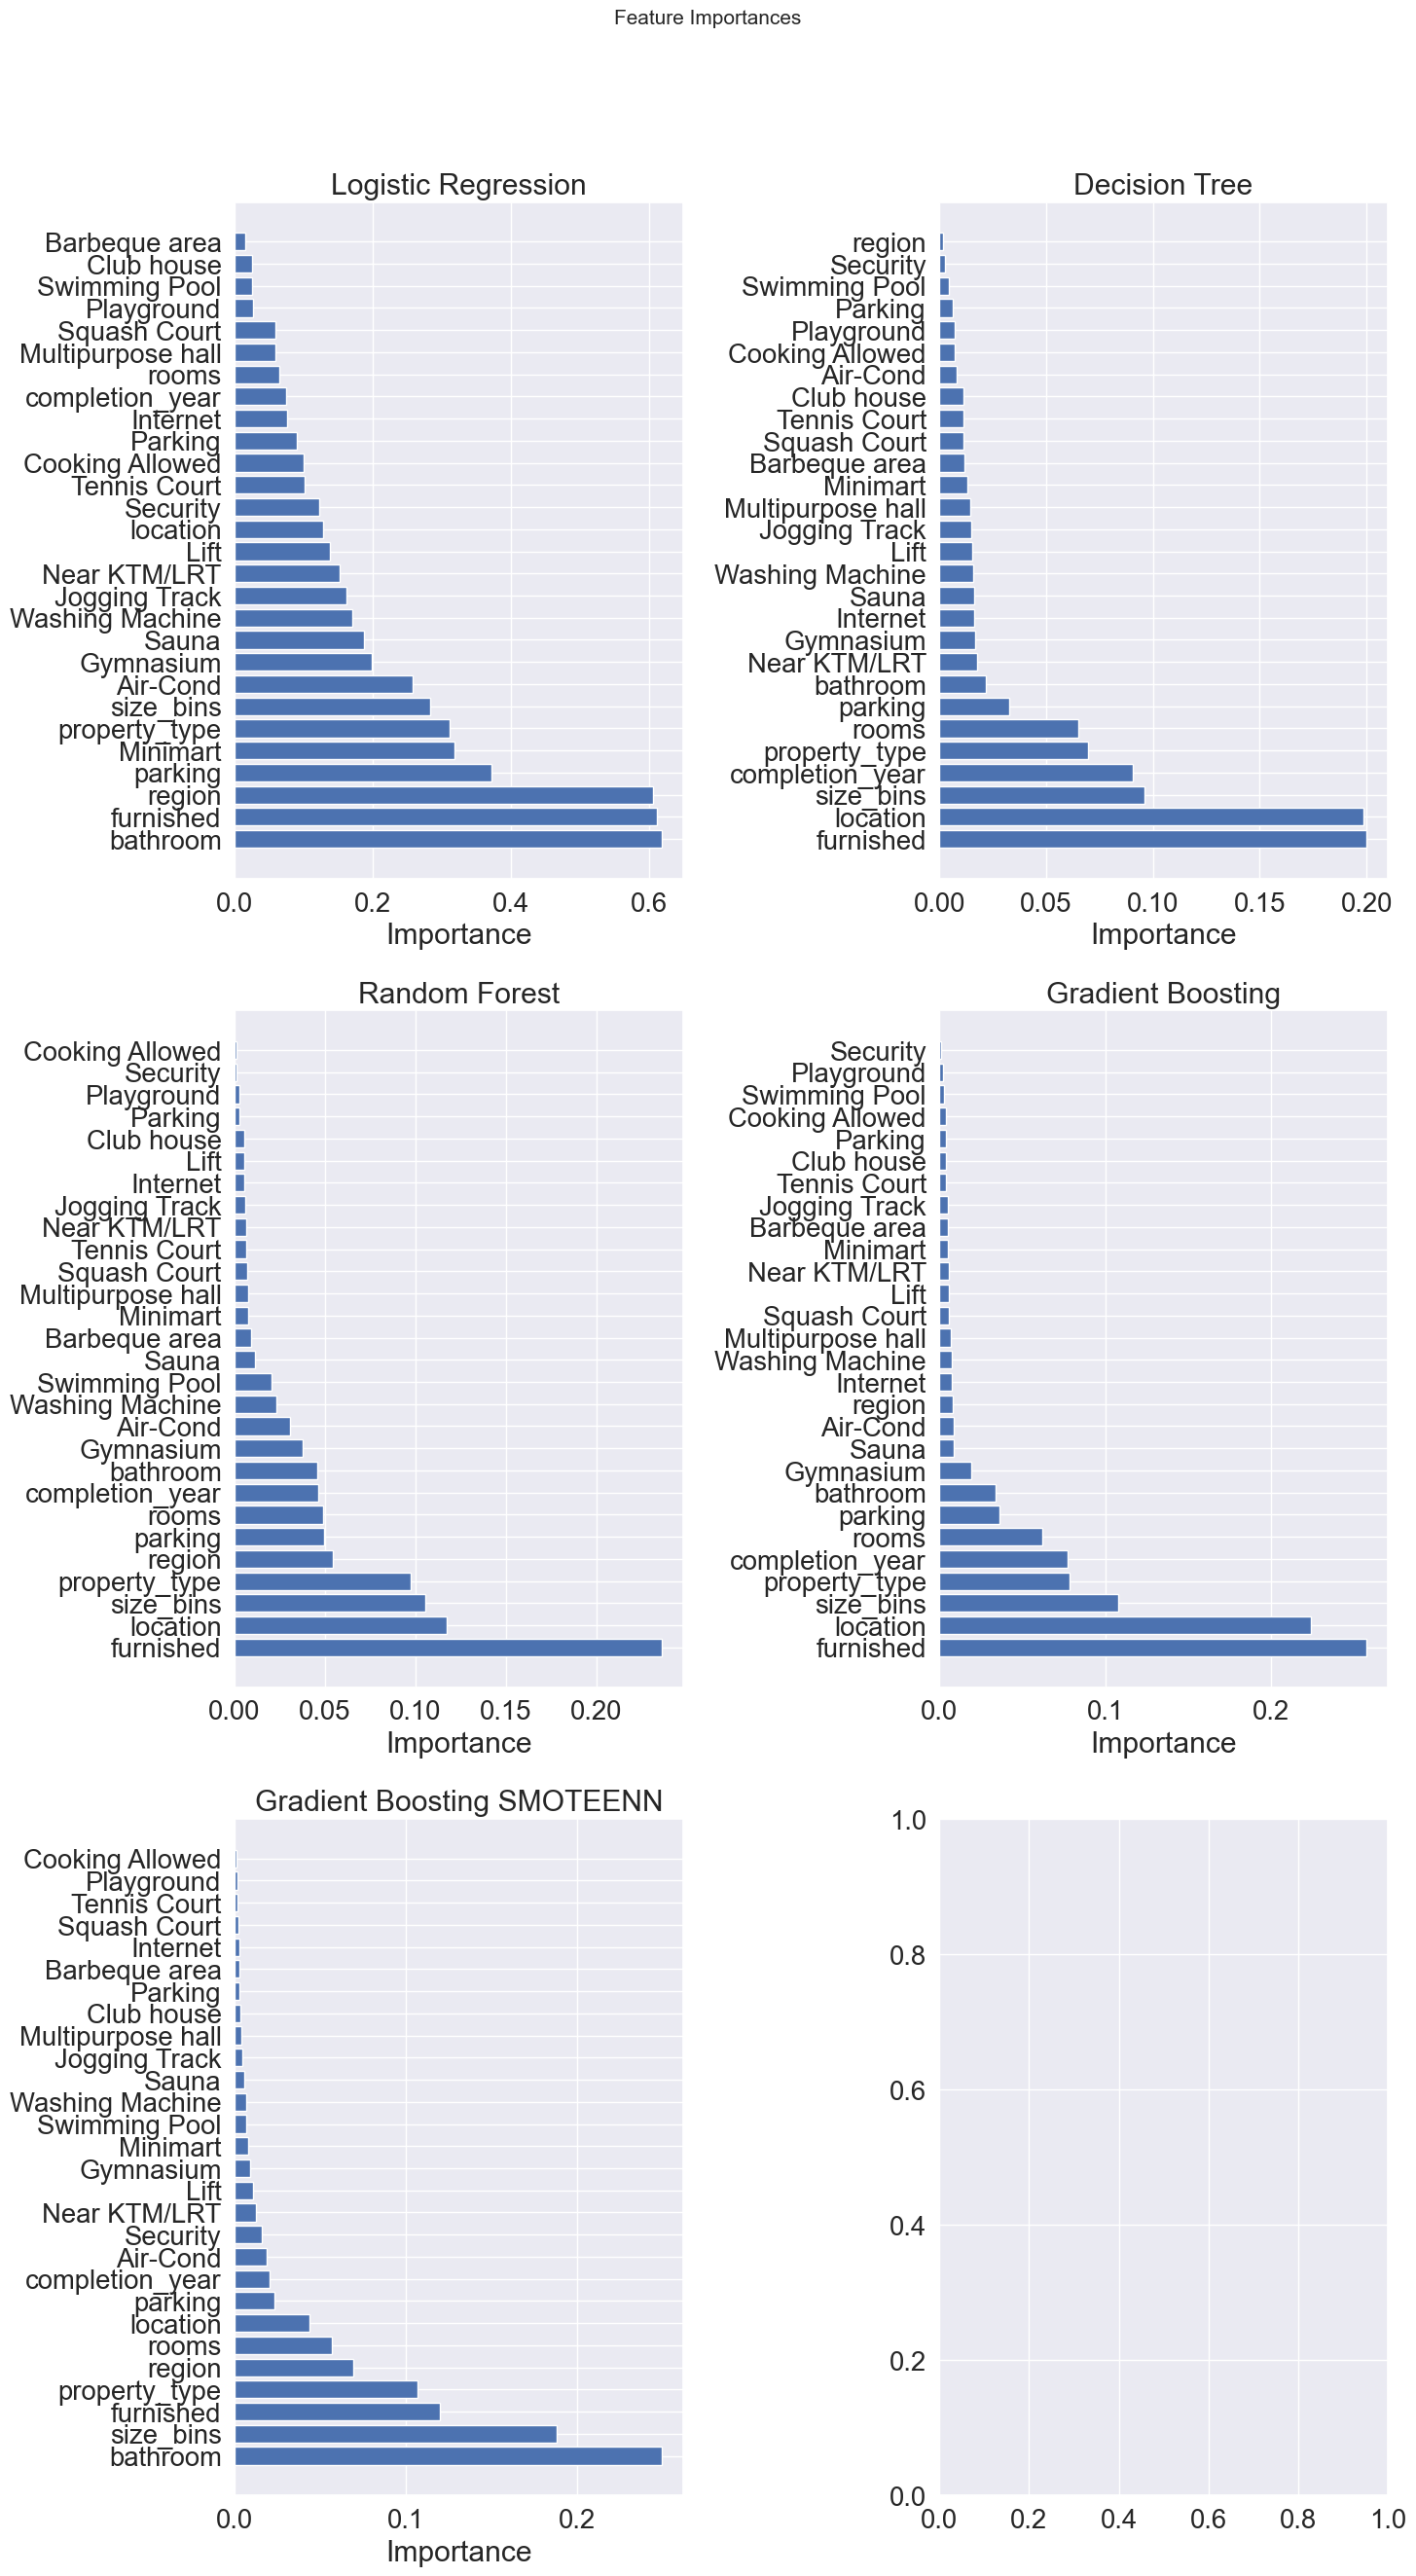

In [403]:
# Plot feature importances for each model
fig, axs = plt.subplots(3, 2, figsize=(15, 28))
fig.suptitle('Feature Importances', fontsize=15)

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Gradient Boosting SMOTEENN']
for i, model in enumerate(models):
    ax = axs[i // 2, i % 2]
    importance_df.sort_values(by=model, ascending=False, inplace=True)
    ax.barh(importance_df['Feature'], importance_df[model])
    ax.set_title(model)
    ax.set_xlabel('Importance')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 6. Answer the problem


From all the models, the Gradient Boosting with resampling model (GBR 4) is the best-performing model for this project due to higher overall accuracy, MCC, and ROC AUC score, higher precision and recall across categories and reduced overfitting.

1.	Train and Test Scores:
o	GBR 4 has the highest test score (0.8655) and train score (0.9960).

2.	Cross-validation Score:
o	GBR 4 also has the highest cross-validation score (0.9833), indicating good generalization.

3.	MCC (Matthews Correlation Coefficient) - Test:
o	GBR 4 has the highest MCC (0.7107), indicating a better balance between precision and recall for different classes.

4.	ROC AUC Score:
o	GBR 4 has the highest ROC AUC score (0.9535), indicating better overall performance across all thresholds.

5.	F1 Scores:
o	GBR 4 has the highest F1 Score on both the train (0.9960) and test (0.8661) sets.

Conclusion

GB 4 (Gradient Boosting with SMOTEENN, Weight, and Parameters from GridSearchCV) is the best model based on the evaluation metrics. It has the highest scores across most performance indicators, suggesting it is the most effective and well-balanced model for this project.
